In [1]:
import time
import torch
from torch.utils.data import Dataset
from torch.utils.data import Subset
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.autograd import Variable
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.io
import numpy as np
import math
from sklearn import svm
from sklearn import metrics
import math
import time
import matplotlib.pyplot as plt


In [2]:
data = torchvision.datasets.ImageFolder("extracted_images")

In [3]:
def create_data(data):
    x = []
    y = []
    for tup in data.imgs:
        path = tup[0]
        label = tup[1]
        image = Image.open(path)
        converter = torchvision.transforms.ToTensor()
        x.append(converter.__call__(image).numpy())
        y.append(label)
    x = np.array(x)
    y = np.array(y)
    return x,y
        

In [4]:
x,y = create_data(data)

In [5]:
class HandWrittenDataset(Dataset):
    
    # TODO:
    # Define constructor for AnimalDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, x,y):
        super(HandWrittenDataset, self).__init__()
        self.data = x
        self.truth = y
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        _x = self.data[index]
        _y = self.truth[index]
        return _x, _y

In [6]:
all_data = HandWrittenDataset(x,y)
x.shape[0]
print(all_data.__len__)

<bound method HandWrittenDataset.__len__ of <__main__.HandWrittenDataset object at 0x1a23370be0>>


In [7]:
train_dataset,test_dataset = torch.utils.data.random_split(all_data , [300779, 75195])

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
class Softmax(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): 
          super(Softmax, self).__init__()
          self.linear1 = nn.Linear(2025,82,bias=True).to(device)
     
    def forward(self, X): 
        X = self.linear1(X.view(X.shape[0],-1))
        return X

In [20]:
#HINT: note that your training time should not take many days.

#TODO:
#Pick your hyper parameters
max_epoch = 100
train_batch = 50
test_batch = 100

learning_rate = 0.01

def main(train_dataset,test_dataset): # you are free to change parameters
    trainloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=train_batch,
                                           shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=test_batch,
                                           shuffle=False)
    # initialize your GENet neural network
    model = Softmax()
    # define your loss function
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9,weight_decay=5e-04) # you can play with momentum and weight_decay parameters as well
    train_loss = []
    for epoch in range(max_epoch):
      train(epoch, model, criterion, optimizer,trainloader,train_loss)
    return model,train_loss
''' Train your network for a one epoch '''
def train(epoch, model, criterion, optimizer,loader,train_loss): # you are free to change parameters
    model.train()
    loss_total = []
    for batch_idx, (data, labels) in enumerate(loader):
        # TODO:
        # Implement training code for a one iteration
        #data_time means data loading time per batch, and batch_time means forward/backward time during training.
        data = data.to(device)
        labels = labels.to(device).flatten()
        data, labels= Variable(data), Variable(labels)#might be unnecessary
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        loss_total.append(loss.data)
    
    print("Epoch: ",epoch, " loss: ",np.mean(np.array(loss_total)))
    train_loss.append(np.mean(np.array(loss_total)))

''' Test&Validate your network '''
def test(model, criterion, loader): # you are free to change parameters
    total = 0
    correct = 0
    model.eval()
    with torch.no_grad():
        for batch_idx, (data, labels) in enumerate(loader):
            # TODO:
            # Implement test code
            data = data.to(device)
            labels = labels.to(device).flatten()
            data, labels= Variable(data), Variable(labels)
            output = model(data)
            total = total + output.shape[0]
            correct = correct + correctPred(output,labels)
            loss = criterion(output,labels)

    return correct / total

In [11]:
trained_model,train_loss = main(train_dataset,test_dataset)


Epoch:  0  loss:  2.3874788
Epoch:  1  loss:  1.5604364
Epoch:  2  loss:  1.4424882
Epoch:  3  loss:  1.3866756
Epoch:  4  loss:  1.3460382
Epoch:  5  loss:  1.3421088
Epoch:  6  loss:  1.3270668
Epoch:  7  loss:  1.3205675
Epoch:  8  loss:  1.3066369
Epoch:  9  loss:  1.2948694
Epoch:  10  loss:  1.3135077
Epoch:  11  loss:  1.2963128
Epoch:  12  loss:  1.3205948
Epoch:  13  loss:  1.3008386
Epoch:  14  loss:  1.3046793
Epoch:  15  loss:  1.3233954
Epoch:  16  loss:  1.3054961
Epoch:  17  loss:  1.3047355
Epoch:  18  loss:  1.3041575
Epoch:  19  loss:  1.313423
Epoch:  20  loss:  1.2964987
Epoch:  21  loss:  1.2954634
Epoch:  22  loss:  1.3097547
Epoch:  23  loss:  1.3085809
Epoch:  24  loss:  1.2984654
Epoch:  25  loss:  1.3043954
Epoch:  26  loss:  1.3094015
Epoch:  27  loss:  1.3064693
Epoch:  28  loss:  1.3086255
Epoch:  29  loss:  1.3023484
Epoch:  30  loss:  1.3026931
Epoch:  31  loss:  1.3146864
Epoch:  32  loss:  1.3074306
Epoch:  33  loss:  1.3213038
Epoch:  34  loss:  1.3219

In [23]:
def correctPred(preds,truths):
    correct = 0
    for prediction,truth in zip(preds,truths):
        pred = np.argmax(prediction)
        print(pred)
        if pred == truth:
            correct = correct + 1
    return correct

In [24]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=test_batch,
                                           shuffle=False)
criterion = torch.nn.CrossEntropyLoss()

In [25]:
accuracy = test(trained_model,criterion,test_loader)

tensor(67)
tensor(10)
tensor(1)
tensor(8)
tensor(23)
tensor(34)
tensor(1)
tensor(3)
tensor(11)
tensor(5)
tensor(17)
tensor(8)
tensor(0)
tensor(27)
tensor(70)
tensor(1)
tensor(32)
tensor(17)
tensor(70)
tensor(3)
tensor(3)
tensor(3)
tensor(74)
tensor(2)
tensor(17)
tensor(2)
tensor(2)
tensor(14)
tensor(78)
tensor(16)
tensor(45)
tensor(1)
tensor(31)
tensor(3)
tensor(1)
tensor(24)
tensor(32)
tensor(2)
tensor(73)
tensor(32)
tensor(63)
tensor(32)
tensor(47)
tensor(37)
tensor(10)
tensor(11)
tensor(9)
tensor(8)
tensor(5)
tensor(41)
tensor(31)
tensor(15)
tensor(78)
tensor(3)
tensor(3)
tensor(16)
tensor(5)
tensor(1)
tensor(6)
tensor(11)
tensor(31)
tensor(18)
tensor(16)
tensor(3)
tensor(32)
tensor(57)
tensor(32)
tensor(70)
tensor(15)
tensor(3)
tensor(2)
tensor(14)
tensor(8)
tensor(4)
tensor(74)
tensor(24)
tensor(27)
tensor(16)
tensor(3)
tensor(3)
tensor(0)
tensor(8)
tensor(14)
tensor(5)
tensor(71)
tensor(14)
tensor(17)
tensor(1)
tensor(32)
tensor(3)
tensor(5)
tensor(69)
tensor(1)
tensor(1)
tensor(

tensor(70)
tensor(9)
tensor(3)
tensor(9)
tensor(9)
tensor(16)
tensor(5)
tensor(32)
tensor(47)
tensor(18)
tensor(18)
tensor(55)
tensor(1)
tensor(10)
tensor(10)
tensor(70)
tensor(3)
tensor(70)
tensor(5)
tensor(74)
tensor(9)
tensor(24)
tensor(47)
tensor(6)
tensor(31)
tensor(34)
tensor(17)
tensor(17)
tensor(14)
tensor(5)
tensor(5)
tensor(47)
tensor(9)
tensor(50)
tensor(6)
tensor(34)
tensor(37)
tensor(4)
tensor(3)
tensor(0)
tensor(18)
tensor(5)
tensor(24)
tensor(17)
tensor(71)
tensor(3)
tensor(3)
tensor(8)
tensor(26)
tensor(17)
tensor(11)
tensor(41)
tensor(5)
tensor(0)
tensor(5)
tensor(61)
tensor(27)
tensor(2)
tensor(5)
tensor(77)
tensor(9)
tensor(69)
tensor(32)
tensor(3)
tensor(3)
tensor(27)
tensor(17)
tensor(18)
tensor(8)
tensor(32)
tensor(5)
tensor(2)
tensor(5)
tensor(48)
tensor(5)
tensor(3)
tensor(69)
tensor(13)
tensor(35)
tensor(8)
tensor(47)
tensor(8)
tensor(17)
tensor(8)
tensor(8)
tensor(10)
tensor(1)
tensor(14)
tensor(5)
tensor(21)
tensor(3)
tensor(74)
tensor(17)
tensor(8)
tensor(5)

tensor(5)
tensor(26)
tensor(3)
tensor(2)
tensor(3)
tensor(73)
tensor(7)
tensor(74)
tensor(6)
tensor(10)
tensor(10)
tensor(67)
tensor(8)
tensor(27)
tensor(27)
tensor(70)
tensor(74)
tensor(27)
tensor(18)
tensor(10)
tensor(8)
tensor(3)
tensor(74)
tensor(14)
tensor(15)
tensor(9)
tensor(14)
tensor(32)
tensor(9)
tensor(1)
tensor(48)
tensor(12)
tensor(17)
tensor(2)
tensor(78)
tensor(2)
tensor(8)
tensor(2)
tensor(3)
tensor(5)
tensor(16)
tensor(62)
tensor(16)
tensor(50)
tensor(16)
tensor(31)
tensor(18)
tensor(27)
tensor(9)
tensor(69)
tensor(5)
tensor(17)
tensor(16)
tensor(78)
tensor(27)
tensor(78)
tensor(8)
tensor(34)
tensor(5)
tensor(5)
tensor(18)
tensor(70)
tensor(14)
tensor(9)
tensor(17)
tensor(16)
tensor(74)
tensor(6)
tensor(72)
tensor(14)
tensor(1)
tensor(3)
tensor(1)
tensor(6)
tensor(47)
tensor(5)
tensor(70)
tensor(35)
tensor(47)
tensor(31)
tensor(6)
tensor(17)
tensor(5)
tensor(5)
tensor(9)
tensor(27)
tensor(48)
tensor(15)
tensor(14)
tensor(23)
tensor(14)
tensor(2)
tensor(2)
tensor(16)
te

tensor(35)
tensor(1)
tensor(27)
tensor(70)
tensor(10)
tensor(13)
tensor(3)
tensor(45)
tensor(16)
tensor(9)
tensor(15)
tensor(17)
tensor(27)
tensor(70)
tensor(5)
tensor(1)
tensor(3)
tensor(22)
tensor(17)
tensor(5)
tensor(71)
tensor(32)
tensor(1)
tensor(1)
tensor(5)
tensor(73)
tensor(17)
tensor(56)
tensor(5)
tensor(78)
tensor(1)
tensor(32)
tensor(78)
tensor(78)
tensor(14)
tensor(17)
tensor(5)
tensor(72)
tensor(6)
tensor(2)
tensor(27)
tensor(32)
tensor(47)
tensor(2)
tensor(6)
tensor(27)
tensor(3)
tensor(69)
tensor(18)
tensor(16)
tensor(5)
tensor(27)
tensor(55)
tensor(8)
tensor(6)
tensor(14)
tensor(14)
tensor(21)
tensor(5)
tensor(17)
tensor(5)
tensor(3)
tensor(14)
tensor(69)
tensor(0)
tensor(18)
tensor(45)
tensor(71)
tensor(5)
tensor(10)
tensor(16)
tensor(8)
tensor(67)
tensor(18)
tensor(10)
tensor(17)
tensor(27)
tensor(34)
tensor(5)
tensor(8)
tensor(69)
tensor(8)
tensor(76)
tensor(8)
tensor(15)
tensor(31)
tensor(70)
tensor(8)
tensor(3)
tensor(16)
tensor(10)
tensor(70)
tensor(3)
tensor(69)


tensor(71)
tensor(74)
tensor(17)
tensor(74)
tensor(11)
tensor(18)
tensor(27)
tensor(75)
tensor(0)
tensor(78)
tensor(16)
tensor(17)
tensor(8)
tensor(6)
tensor(17)
tensor(16)
tensor(16)
tensor(18)
tensor(74)
tensor(23)
tensor(34)
tensor(70)
tensor(56)
tensor(78)
tensor(35)
tensor(8)
tensor(26)
tensor(6)
tensor(0)
tensor(1)
tensor(10)
tensor(5)
tensor(71)
tensor(24)
tensor(5)
tensor(26)
tensor(1)
tensor(2)
tensor(27)
tensor(35)
tensor(10)
tensor(16)
tensor(2)
tensor(2)
tensor(78)
tensor(3)
tensor(10)
tensor(2)
tensor(69)
tensor(66)
tensor(32)
tensor(45)
tensor(17)
tensor(73)
tensor(27)
tensor(32)
tensor(41)
tensor(72)
tensor(24)
tensor(1)
tensor(3)
tensor(8)
tensor(14)
tensor(6)
tensor(1)
tensor(45)
tensor(3)
tensor(2)
tensor(78)
tensor(8)
tensor(5)
tensor(35)
tensor(24)
tensor(5)
tensor(3)
tensor(12)
tensor(67)
tensor(56)
tensor(78)
tensor(3)
tensor(17)
tensor(16)
tensor(32)
tensor(74)
tensor(3)
tensor(35)
tensor(63)
tensor(5)
tensor(16)
tensor(16)
tensor(8)
tensor(15)
tensor(5)
tensor(9

tensor(3)
tensor(27)
tensor(5)
tensor(27)
tensor(5)
tensor(31)
tensor(16)
tensor(9)
tensor(27)
tensor(5)
tensor(11)
tensor(32)
tensor(23)
tensor(27)
tensor(5)
tensor(9)
tensor(5)
tensor(2)
tensor(1)
tensor(8)
tensor(61)
tensor(74)
tensor(0)
tensor(10)
tensor(23)
tensor(3)
tensor(5)
tensor(2)
tensor(14)
tensor(3)
tensor(1)
tensor(1)
tensor(34)
tensor(78)
tensor(17)
tensor(14)
tensor(16)
tensor(15)
tensor(3)
tensor(74)
tensor(8)
tensor(32)
tensor(17)
tensor(5)
tensor(21)
tensor(27)
tensor(16)
tensor(70)
tensor(48)
tensor(78)
tensor(2)
tensor(9)
tensor(34)
tensor(22)
tensor(18)
tensor(9)
tensor(70)
tensor(6)
tensor(9)
tensor(14)
tensor(69)
tensor(16)
tensor(5)
tensor(24)
tensor(14)
tensor(78)
tensor(49)
tensor(3)
tensor(11)
tensor(8)
tensor(1)
tensor(6)
tensor(8)
tensor(5)
tensor(23)
tensor(9)
tensor(15)
tensor(78)
tensor(15)
tensor(1)
tensor(5)
tensor(56)
tensor(5)
tensor(3)
tensor(74)
tensor(17)
tensor(3)
tensor(9)
tensor(70)
tensor(1)
tensor(14)
tensor(6)
tensor(35)
tensor(45)
tensor(2

tensor(27)
tensor(63)
tensor(47)
tensor(9)
tensor(5)
tensor(5)
tensor(14)
tensor(15)
tensor(16)
tensor(16)
tensor(3)
tensor(22)
tensor(17)
tensor(10)
tensor(10)
tensor(17)
tensor(79)
tensor(10)
tensor(5)
tensor(34)
tensor(15)
tensor(8)
tensor(1)
tensor(3)
tensor(78)
tensor(45)
tensor(15)
tensor(3)
tensor(26)
tensor(9)
tensor(63)
tensor(2)
tensor(3)
tensor(47)
tensor(2)
tensor(3)
tensor(17)
tensor(50)
tensor(16)
tensor(8)
tensor(16)
tensor(18)
tensor(16)
tensor(26)
tensor(69)
tensor(73)
tensor(78)
tensor(3)
tensor(14)
tensor(2)
tensor(9)
tensor(70)
tensor(8)
tensor(67)
tensor(71)
tensor(3)
tensor(78)
tensor(66)
tensor(27)
tensor(1)
tensor(23)
tensor(18)
tensor(27)
tensor(23)
tensor(8)
tensor(9)
tensor(70)
tensor(50)
tensor(63)
tensor(5)
tensor(11)
tensor(3)
tensor(9)
tensor(8)
tensor(71)
tensor(34)
tensor(16)
tensor(1)
tensor(27)
tensor(15)
tensor(50)
tensor(3)
tensor(2)
tensor(78)
tensor(17)
tensor(1)
tensor(24)
tensor(3)
tensor(6)
tensor(17)
tensor(15)
tensor(8)
tensor(10)
tensor(5)
t

tensor(1)
tensor(16)
tensor(37)
tensor(31)
tensor(14)
tensor(17)
tensor(48)
tensor(5)
tensor(6)
tensor(16)
tensor(17)
tensor(48)
tensor(5)
tensor(16)
tensor(4)
tensor(24)
tensor(3)
tensor(9)
tensor(3)
tensor(55)
tensor(69)
tensor(8)
tensor(78)
tensor(69)
tensor(3)
tensor(63)
tensor(35)
tensor(3)
tensor(50)
tensor(8)
tensor(73)
tensor(3)
tensor(0)
tensor(10)
tensor(2)
tensor(35)
tensor(70)
tensor(2)
tensor(21)
tensor(50)
tensor(48)
tensor(78)
tensor(77)
tensor(24)
tensor(2)
tensor(8)
tensor(32)
tensor(1)
tensor(8)
tensor(17)
tensor(5)
tensor(16)
tensor(50)
tensor(18)
tensor(3)
tensor(5)
tensor(71)
tensor(10)
tensor(5)
tensor(27)
tensor(1)
tensor(6)
tensor(3)
tensor(15)
tensor(24)
tensor(9)
tensor(48)
tensor(14)
tensor(14)
tensor(8)
tensor(63)
tensor(18)
tensor(5)
tensor(8)
tensor(3)
tensor(10)
tensor(14)
tensor(73)
tensor(3)
tensor(5)
tensor(8)
tensor(75)
tensor(70)
tensor(27)
tensor(1)
tensor(31)
tensor(47)
tensor(2)
tensor(2)
tensor(6)
tensor(3)
tensor(17)
tensor(9)
tensor(3)
tensor(7

tensor(14)
tensor(74)
tensor(61)
tensor(15)
tensor(11)
tensor(9)
tensor(47)
tensor(37)
tensor(73)
tensor(78)
tensor(70)
tensor(35)
tensor(73)
tensor(17)
tensor(6)
tensor(47)
tensor(10)
tensor(17)
tensor(2)
tensor(35)
tensor(17)
tensor(12)
tensor(0)
tensor(27)
tensor(48)
tensor(5)
tensor(27)
tensor(2)
tensor(45)
tensor(5)
tensor(3)
tensor(48)
tensor(3)
tensor(14)
tensor(8)
tensor(32)
tensor(2)
tensor(2)
tensor(8)
tensor(24)
tensor(70)
tensor(5)
tensor(8)
tensor(71)
tensor(17)
tensor(75)
tensor(9)
tensor(70)
tensor(69)
tensor(50)
tensor(5)
tensor(6)
tensor(14)
tensor(3)
tensor(78)
tensor(16)
tensor(1)
tensor(32)
tensor(8)
tensor(48)
tensor(5)
tensor(2)
tensor(3)
tensor(9)
tensor(3)
tensor(16)
tensor(74)
tensor(5)
tensor(35)
tensor(6)
tensor(5)
tensor(3)
tensor(2)
tensor(22)
tensor(5)
tensor(5)
tensor(8)
tensor(31)
tensor(23)
tensor(34)
tensor(47)
tensor(5)
tensor(5)
tensor(5)
tensor(31)
tensor(17)
tensor(70)
tensor(17)
tensor(27)
tensor(1)
tensor(14)
tensor(10)
tensor(10)
tensor(3)
tenso

tensor(16)
tensor(5)
tensor(5)
tensor(16)
tensor(3)
tensor(74)
tensor(1)
tensor(8)
tensor(10)
tensor(14)
tensor(0)
tensor(32)
tensor(63)
tensor(22)
tensor(27)
tensor(74)
tensor(5)
tensor(1)
tensor(17)
tensor(24)
tensor(8)
tensor(17)
tensor(35)
tensor(3)
tensor(1)
tensor(14)
tensor(11)
tensor(2)
tensor(3)
tensor(5)
tensor(5)
tensor(18)
tensor(15)
tensor(70)
tensor(61)
tensor(3)
tensor(5)
tensor(75)
tensor(14)
tensor(5)
tensor(75)
tensor(3)
tensor(70)
tensor(3)
tensor(3)
tensor(24)
tensor(3)
tensor(15)
tensor(0)
tensor(5)
tensor(34)
tensor(27)
tensor(45)
tensor(7)
tensor(5)
tensor(15)
tensor(16)
tensor(78)
tensor(31)
tensor(73)
tensor(13)
tensor(2)
tensor(5)
tensor(74)
tensor(23)
tensor(32)
tensor(8)
tensor(1)
tensor(74)
tensor(2)
tensor(16)
tensor(74)
tensor(1)
tensor(70)
tensor(14)
tensor(14)
tensor(8)
tensor(24)
tensor(5)
tensor(1)
tensor(17)
tensor(27)
tensor(47)
tensor(15)
tensor(71)
tensor(3)
tensor(8)
tensor(70)
tensor(16)
tensor(32)
tensor(50)
tensor(14)
tensor(17)
tensor(23)
ten

tensor(3)
tensor(74)
tensor(5)
tensor(70)
tensor(11)
tensor(50)
tensor(31)
tensor(14)
tensor(70)
tensor(14)
tensor(11)
tensor(70)
tensor(5)
tensor(3)
tensor(6)
tensor(74)
tensor(1)
tensor(6)
tensor(17)
tensor(3)
tensor(9)
tensor(31)
tensor(8)
tensor(16)
tensor(55)
tensor(17)
tensor(10)
tensor(14)
tensor(17)
tensor(17)
tensor(3)
tensor(35)
tensor(5)
tensor(78)
tensor(69)
tensor(6)
tensor(17)
tensor(3)
tensor(2)
tensor(32)
tensor(1)
tensor(16)
tensor(16)
tensor(47)
tensor(3)
tensor(77)
tensor(15)
tensor(3)
tensor(17)
tensor(9)
tensor(45)
tensor(5)
tensor(74)
tensor(22)
tensor(6)
tensor(15)
tensor(3)
tensor(3)
tensor(78)
tensor(32)
tensor(3)
tensor(47)
tensor(8)
tensor(11)
tensor(8)
tensor(48)
tensor(2)
tensor(72)
tensor(8)
tensor(17)
tensor(72)
tensor(50)
tensor(74)
tensor(27)
tensor(2)
tensor(27)
tensor(15)
tensor(74)
tensor(32)
tensor(35)
tensor(2)
tensor(3)
tensor(16)
tensor(8)
tensor(17)
tensor(3)
tensor(10)
tensor(70)
tensor(78)
tensor(3)
tensor(45)
tensor(27)
tensor(56)
tensor(50)


tensor(14)
tensor(50)
tensor(16)
tensor(10)
tensor(0)
tensor(6)
tensor(5)
tensor(69)
tensor(1)
tensor(26)
tensor(17)
tensor(14)
tensor(70)
tensor(17)
tensor(34)
tensor(37)
tensor(3)
tensor(3)
tensor(78)
tensor(3)
tensor(41)
tensor(10)
tensor(9)
tensor(16)
tensor(70)
tensor(1)
tensor(55)
tensor(17)
tensor(1)
tensor(16)
tensor(2)
tensor(6)
tensor(1)
tensor(61)
tensor(70)
tensor(75)
tensor(31)
tensor(3)
tensor(24)
tensor(70)
tensor(1)
tensor(3)
tensor(71)
tensor(8)
tensor(78)
tensor(5)
tensor(5)
tensor(14)
tensor(1)
tensor(1)
tensor(10)
tensor(5)
tensor(2)
tensor(8)
tensor(31)
tensor(47)
tensor(5)
tensor(5)
tensor(70)
tensor(2)
tensor(17)
tensor(5)
tensor(16)
tensor(1)
tensor(17)
tensor(3)
tensor(5)
tensor(70)
tensor(70)
tensor(14)
tensor(0)
tensor(23)
tensor(17)
tensor(47)
tensor(34)
tensor(1)
tensor(6)
tensor(14)
tensor(1)
tensor(48)
tensor(5)
tensor(8)
tensor(3)
tensor(35)
tensor(69)
tensor(61)
tensor(5)
tensor(78)
tensor(5)
tensor(14)
tensor(0)
tensor(9)
tensor(17)
tensor(16)
tensor(5

tensor(3)
tensor(2)
tensor(10)
tensor(50)
tensor(5)
tensor(54)
tensor(69)
tensor(34)
tensor(35)
tensor(5)
tensor(9)
tensor(35)
tensor(74)
tensor(15)
tensor(10)
tensor(10)
tensor(10)
tensor(27)
tensor(9)
tensor(17)
tensor(14)
tensor(5)
tensor(3)
tensor(61)
tensor(5)
tensor(50)
tensor(35)
tensor(5)
tensor(1)
tensor(12)
tensor(6)
tensor(1)
tensor(1)
tensor(5)
tensor(16)
tensor(49)
tensor(3)
tensor(0)
tensor(6)
tensor(5)
tensor(3)
tensor(5)
tensor(17)
tensor(18)
tensor(2)
tensor(48)
tensor(2)
tensor(71)
tensor(24)
tensor(15)
tensor(0)
tensor(31)
tensor(14)
tensor(16)
tensor(27)
tensor(23)
tensor(24)
tensor(74)
tensor(3)
tensor(35)
tensor(3)
tensor(6)
tensor(78)
tensor(1)
tensor(0)
tensor(8)
tensor(6)
tensor(70)
tensor(32)
tensor(17)
tensor(16)
tensor(63)
tensor(20)
tensor(1)
tensor(11)
tensor(1)
tensor(48)
tensor(47)
tensor(8)
tensor(26)
tensor(16)
tensor(16)
tensor(8)
tensor(13)
tensor(9)
tensor(70)
tensor(32)
tensor(17)
tensor(5)
tensor(29)
tensor(47)
tensor(16)
tensor(17)
tensor(78)
ten

tensor(1)
tensor(10)
tensor(69)
tensor(24)
tensor(3)
tensor(78)
tensor(3)
tensor(34)
tensor(78)
tensor(11)
tensor(9)
tensor(22)
tensor(3)
tensor(1)
tensor(3)
tensor(71)
tensor(78)
tensor(16)
tensor(5)
tensor(47)
tensor(50)
tensor(78)
tensor(32)
tensor(5)
tensor(27)
tensor(1)
tensor(3)
tensor(8)
tensor(74)
tensor(5)
tensor(13)
tensor(5)
tensor(78)
tensor(21)
tensor(22)
tensor(73)
tensor(3)
tensor(5)
tensor(27)
tensor(3)
tensor(10)
tensor(16)
tensor(0)
tensor(2)
tensor(3)
tensor(12)
tensor(17)
tensor(17)
tensor(27)
tensor(2)
tensor(31)
tensor(1)
tensor(47)
tensor(8)
tensor(1)
tensor(16)
tensor(3)
tensor(17)
tensor(17)
tensor(1)
tensor(27)
tensor(16)
tensor(35)
tensor(10)
tensor(31)
tensor(74)
tensor(63)
tensor(1)
tensor(70)
tensor(8)
tensor(32)
tensor(69)
tensor(14)
tensor(35)
tensor(2)
tensor(16)
tensor(5)
tensor(5)
tensor(8)
tensor(5)
tensor(5)
tensor(3)
tensor(8)
tensor(3)
tensor(5)
tensor(69)
tensor(1)
tensor(55)
tensor(70)
tensor(35)
tensor(8)
tensor(16)
tensor(8)
tensor(1)
tensor(7

tensor(5)
tensor(5)
tensor(17)
tensor(16)
tensor(72)
tensor(3)
tensor(8)
tensor(18)
tensor(24)
tensor(27)
tensor(70)
tensor(70)
tensor(8)
tensor(8)
tensor(71)
tensor(33)
tensor(21)
tensor(31)
tensor(55)
tensor(3)
tensor(4)
tensor(5)
tensor(2)
tensor(16)
tensor(4)
tensor(8)
tensor(3)
tensor(32)
tensor(32)
tensor(2)
tensor(74)
tensor(24)
tensor(32)
tensor(6)
tensor(70)
tensor(18)
tensor(69)
tensor(10)
tensor(2)
tensor(2)
tensor(72)
tensor(3)
tensor(3)
tensor(9)
tensor(26)
tensor(2)
tensor(16)
tensor(74)
tensor(10)
tensor(77)
tensor(2)
tensor(3)
tensor(70)
tensor(3)
tensor(11)
tensor(1)
tensor(21)
tensor(2)
tensor(9)
tensor(74)
tensor(5)
tensor(47)
tensor(8)
tensor(66)
tensor(3)
tensor(70)
tensor(3)
tensor(6)
tensor(67)
tensor(15)
tensor(67)
tensor(6)
tensor(3)
tensor(3)
tensor(8)
tensor(32)
tensor(17)
tensor(3)
tensor(8)
tensor(2)
tensor(5)
tensor(5)
tensor(6)
tensor(3)
tensor(6)
tensor(32)
tensor(56)
tensor(8)
tensor(66)
tensor(3)
tensor(8)
tensor(31)
tensor(9)
tensor(12)
tensor(27)
ten

tensor(27)
tensor(51)
tensor(16)
tensor(18)
tensor(56)
tensor(31)
tensor(3)
tensor(15)
tensor(77)
tensor(3)
tensor(17)
tensor(70)
tensor(17)
tensor(11)
tensor(2)
tensor(5)
tensor(6)
tensor(32)
tensor(69)
tensor(78)
tensor(32)
tensor(17)
tensor(16)
tensor(16)
tensor(11)
tensor(47)
tensor(17)
tensor(11)
tensor(48)
tensor(61)
tensor(35)
tensor(3)
tensor(78)
tensor(3)
tensor(1)
tensor(2)
tensor(1)
tensor(17)
tensor(14)
tensor(3)
tensor(5)
tensor(18)
tensor(1)
tensor(48)
tensor(6)
tensor(74)
tensor(51)
tensor(48)
tensor(16)
tensor(15)
tensor(17)
tensor(5)
tensor(8)
tensor(50)
tensor(9)
tensor(8)
tensor(8)
tensor(41)
tensor(1)
tensor(14)
tensor(14)
tensor(8)
tensor(18)
tensor(27)
tensor(2)
tensor(26)
tensor(3)
tensor(32)
tensor(16)
tensor(3)
tensor(3)
tensor(14)
tensor(81)
tensor(9)
tensor(16)
tensor(5)
tensor(6)
tensor(63)
tensor(8)
tensor(3)
tensor(78)
tensor(23)
tensor(16)
tensor(27)
tensor(15)
tensor(3)
tensor(5)
tensor(5)
tensor(10)
tensor(5)
tensor(16)
tensor(18)
tensor(10)
tensor(45)


tensor(2)
tensor(16)
tensor(69)
tensor(50)
tensor(15)
tensor(2)
tensor(17)
tensor(49)
tensor(70)
tensor(14)
tensor(2)
tensor(3)
tensor(71)
tensor(24)
tensor(34)
tensor(5)
tensor(16)
tensor(11)
tensor(45)
tensor(2)
tensor(54)
tensor(8)
tensor(78)
tensor(5)
tensor(26)
tensor(6)
tensor(16)
tensor(3)
tensor(9)
tensor(9)
tensor(32)
tensor(5)
tensor(17)
tensor(9)
tensor(15)
tensor(9)
tensor(3)
tensor(8)
tensor(17)
tensor(32)
tensor(3)
tensor(24)
tensor(75)
tensor(32)
tensor(72)
tensor(16)
tensor(32)
tensor(14)
tensor(1)
tensor(8)
tensor(6)
tensor(10)
tensor(3)
tensor(47)
tensor(2)
tensor(3)
tensor(16)
tensor(78)
tensor(0)
tensor(3)
tensor(1)
tensor(27)
tensor(3)
tensor(8)
tensor(3)
tensor(16)
tensor(72)
tensor(17)
tensor(73)
tensor(32)
tensor(3)
tensor(45)
tensor(14)
tensor(0)
tensor(70)
tensor(55)
tensor(32)
tensor(56)
tensor(35)
tensor(3)
tensor(6)
tensor(5)
tensor(14)
tensor(78)
tensor(45)
tensor(2)
tensor(8)
tensor(17)
tensor(15)
tensor(1)
tensor(2)
tensor(47)
tensor(3)
tensor(70)
tensor

tensor(3)
tensor(50)
tensor(24)
tensor(74)
tensor(5)
tensor(26)
tensor(32)
tensor(8)
tensor(16)
tensor(69)
tensor(0)
tensor(45)
tensor(14)
tensor(1)
tensor(3)
tensor(5)
tensor(74)
tensor(5)
tensor(9)
tensor(70)
tensor(14)
tensor(78)
tensor(6)
tensor(5)
tensor(14)
tensor(17)
tensor(73)
tensor(3)
tensor(3)
tensor(24)
tensor(16)
tensor(5)
tensor(16)
tensor(2)
tensor(1)
tensor(48)
tensor(47)
tensor(3)
tensor(35)
tensor(27)
tensor(6)
tensor(17)
tensor(5)
tensor(56)
tensor(3)
tensor(3)
tensor(27)
tensor(1)
tensor(3)
tensor(8)
tensor(17)
tensor(5)
tensor(50)
tensor(27)
tensor(3)
tensor(17)
tensor(17)
tensor(8)
tensor(2)
tensor(1)
tensor(3)
tensor(48)
tensor(6)
tensor(35)
tensor(8)
tensor(63)
tensor(78)
tensor(32)
tensor(70)
tensor(32)
tensor(6)
tensor(27)
tensor(6)
tensor(32)
tensor(14)
tensor(74)
tensor(2)
tensor(32)
tensor(32)
tensor(1)
tensor(47)
tensor(10)
tensor(55)
tensor(3)
tensor(45)
tensor(35)
tensor(67)
tensor(17)
tensor(18)
tensor(35)
tensor(3)
tensor(14)
tensor(6)
tensor(70)
tenso

tensor(8)
tensor(48)
tensor(3)
tensor(26)
tensor(18)
tensor(14)
tensor(61)
tensor(17)
tensor(27)
tensor(6)
tensor(32)
tensor(56)
tensor(50)
tensor(16)
tensor(55)
tensor(61)
tensor(32)
tensor(17)
tensor(2)
tensor(75)
tensor(10)
tensor(5)
tensor(2)
tensor(6)
tensor(16)
tensor(27)
tensor(32)
tensor(14)
tensor(9)
tensor(32)
tensor(16)
tensor(5)
tensor(2)
tensor(24)
tensor(70)
tensor(32)
tensor(73)
tensor(37)
tensor(70)
tensor(1)
tensor(73)
tensor(2)
tensor(5)
tensor(70)
tensor(16)
tensor(70)
tensor(2)
tensor(8)
tensor(2)
tensor(15)
tensor(17)
tensor(16)
tensor(70)
tensor(17)
tensor(63)
tensor(6)
tensor(32)
tensor(8)
tensor(1)
tensor(17)
tensor(9)
tensor(23)
tensor(3)
tensor(5)
tensor(16)
tensor(78)
tensor(78)
tensor(78)
tensor(63)
tensor(18)
tensor(3)
tensor(71)
tensor(34)
tensor(31)
tensor(8)
tensor(8)
tensor(70)
tensor(16)
tensor(10)
tensor(17)
tensor(3)
tensor(70)
tensor(14)
tensor(1)
tensor(5)
tensor(56)
tensor(70)
tensor(78)
tensor(8)
tensor(32)
tensor(3)
tensor(14)
tensor(1)
tensor(1

tensor(18)
tensor(31)
tensor(3)
tensor(4)
tensor(27)
tensor(34)
tensor(15)
tensor(17)
tensor(16)
tensor(16)
tensor(50)
tensor(14)
tensor(47)
tensor(5)
tensor(6)
tensor(17)
tensor(6)
tensor(71)
tensor(22)
tensor(5)
tensor(3)
tensor(21)
tensor(70)
tensor(11)
tensor(78)
tensor(24)
tensor(16)
tensor(9)
tensor(3)
tensor(0)
tensor(50)
tensor(0)
tensor(1)
tensor(74)
tensor(5)
tensor(9)
tensor(2)
tensor(3)
tensor(71)
tensor(32)
tensor(63)
tensor(8)
tensor(17)
tensor(27)
tensor(78)
tensor(3)
tensor(13)
tensor(3)
tensor(26)
tensor(2)
tensor(32)
tensor(31)
tensor(8)
tensor(26)
tensor(35)
tensor(23)
tensor(3)
tensor(16)
tensor(35)
tensor(48)
tensor(55)
tensor(16)
tensor(2)
tensor(70)
tensor(16)
tensor(9)
tensor(27)
tensor(10)
tensor(62)
tensor(24)
tensor(35)
tensor(5)
tensor(32)
tensor(76)
tensor(17)
tensor(2)
tensor(27)
tensor(1)
tensor(47)
tensor(1)
tensor(47)
tensor(56)
tensor(5)
tensor(1)
tensor(22)
tensor(2)
tensor(73)
tensor(8)
tensor(74)
tensor(16)
tensor(55)
tensor(16)
tensor(63)
tensor(31

tensor(0)
tensor(21)
tensor(37)
tensor(48)
tensor(64)
tensor(47)
tensor(69)
tensor(27)
tensor(15)
tensor(69)
tensor(8)
tensor(5)
tensor(8)
tensor(63)
tensor(2)
tensor(6)
tensor(8)
tensor(24)
tensor(16)
tensor(3)
tensor(69)
tensor(48)
tensor(32)
tensor(8)
tensor(16)
tensor(21)
tensor(16)
tensor(5)
tensor(16)
tensor(2)
tensor(17)
tensor(2)
tensor(5)
tensor(3)
tensor(70)
tensor(35)
tensor(8)
tensor(17)
tensor(74)
tensor(26)
tensor(9)
tensor(16)
tensor(14)
tensor(31)
tensor(78)
tensor(3)
tensor(16)
tensor(69)
tensor(8)
tensor(73)
tensor(16)
tensor(17)
tensor(5)
tensor(71)
tensor(3)
tensor(5)
tensor(17)
tensor(74)
tensor(3)
tensor(17)
tensor(35)
tensor(17)
tensor(27)
tensor(2)
tensor(48)
tensor(6)
tensor(16)
tensor(70)
tensor(5)
tensor(27)
tensor(78)
tensor(27)
tensor(8)
tensor(1)
tensor(69)
tensor(2)
tensor(15)
tensor(74)
tensor(5)
tensor(9)
tensor(3)
tensor(17)
tensor(50)
tensor(70)
tensor(11)
tensor(0)
tensor(48)
tensor(5)
tensor(23)
tensor(78)
tensor(49)
tensor(50)
tensor(27)
tensor(69)

tensor(8)
tensor(5)
tensor(9)
tensor(69)
tensor(74)
tensor(16)
tensor(24)
tensor(17)
tensor(54)
tensor(8)
tensor(11)
tensor(50)
tensor(10)
tensor(70)
tensor(5)
tensor(2)
tensor(14)
tensor(16)
tensor(3)
tensor(8)
tensor(5)
tensor(27)
tensor(50)
tensor(2)
tensor(16)
tensor(2)
tensor(11)
tensor(74)
tensor(6)
tensor(3)
tensor(3)
tensor(5)
tensor(3)
tensor(26)
tensor(70)
tensor(4)
tensor(27)
tensor(47)
tensor(3)
tensor(14)
tensor(1)
tensor(4)
tensor(17)
tensor(16)
tensor(18)
tensor(74)
tensor(17)
tensor(48)
tensor(1)
tensor(8)
tensor(9)
tensor(34)
tensor(11)
tensor(74)
tensor(48)
tensor(8)
tensor(8)
tensor(6)
tensor(15)
tensor(16)
tensor(3)
tensor(0)
tensor(6)
tensor(69)
tensor(78)
tensor(74)
tensor(8)
tensor(24)
tensor(5)
tensor(27)
tensor(48)
tensor(3)
tensor(74)
tensor(1)
tensor(48)
tensor(16)
tensor(56)
tensor(12)
tensor(5)
tensor(5)
tensor(6)
tensor(10)
tensor(78)
tensor(15)
tensor(78)
tensor(69)
tensor(27)
tensor(8)
tensor(35)
tensor(32)
tensor(32)
tensor(1)
tensor(74)
tensor(45)
tens

tensor(1)
tensor(27)
tensor(31)
tensor(1)
tensor(17)
tensor(5)
tensor(15)
tensor(18)
tensor(48)
tensor(5)
tensor(8)
tensor(18)
tensor(73)
tensor(2)
tensor(16)
tensor(45)
tensor(45)
tensor(3)
tensor(27)
tensor(16)
tensor(14)
tensor(9)
tensor(16)
tensor(23)
tensor(1)
tensor(1)
tensor(5)
tensor(17)
tensor(74)
tensor(63)
tensor(10)
tensor(63)
tensor(63)
tensor(3)
tensor(6)
tensor(5)
tensor(6)
tensor(1)
tensor(18)
tensor(10)
tensor(14)
tensor(10)
tensor(0)
tensor(74)
tensor(3)
tensor(5)
tensor(47)
tensor(2)
tensor(6)
tensor(3)
tensor(2)
tensor(48)
tensor(28)
tensor(78)
tensor(1)
tensor(16)
tensor(3)
tensor(3)
tensor(5)
tensor(31)
tensor(27)
tensor(78)
tensor(17)
tensor(3)
tensor(5)
tensor(6)
tensor(5)
tensor(23)
tensor(50)
tensor(10)
tensor(56)
tensor(3)
tensor(16)
tensor(16)
tensor(16)
tensor(5)
tensor(5)
tensor(27)
tensor(5)
tensor(5)
tensor(8)
tensor(2)
tensor(70)
tensor(15)
tensor(69)
tensor(3)
tensor(74)
tensor(47)
tensor(17)
tensor(5)
tensor(48)
tensor(78)
tensor(2)
tensor(1)
tensor(2

tensor(2)
tensor(32)
tensor(32)
tensor(61)
tensor(17)
tensor(47)
tensor(6)
tensor(78)
tensor(10)
tensor(2)
tensor(5)
tensor(74)
tensor(17)
tensor(17)
tensor(26)
tensor(5)
tensor(16)
tensor(10)
tensor(70)
tensor(22)
tensor(3)
tensor(16)
tensor(14)
tensor(5)
tensor(32)
tensor(3)
tensor(3)
tensor(5)
tensor(3)
tensor(45)
tensor(6)
tensor(18)
tensor(32)
tensor(71)
tensor(3)
tensor(1)
tensor(0)
tensor(27)
tensor(17)
tensor(1)
tensor(16)
tensor(24)
tensor(16)
tensor(9)
tensor(17)
tensor(1)
tensor(47)
tensor(21)
tensor(16)
tensor(74)
tensor(61)
tensor(16)
tensor(32)
tensor(17)
tensor(78)
tensor(10)
tensor(16)
tensor(3)
tensor(45)
tensor(9)
tensor(71)
tensor(10)
tensor(12)
tensor(70)
tensor(8)
tensor(70)
tensor(1)
tensor(71)
tensor(2)
tensor(5)
tensor(32)
tensor(11)
tensor(0)
tensor(18)
tensor(1)
tensor(69)
tensor(8)
tensor(3)
tensor(9)
tensor(63)
tensor(69)
tensor(17)
tensor(78)
tensor(5)
tensor(70)
tensor(17)
tensor(67)
tensor(27)
tensor(16)
tensor(9)
tensor(31)
tensor(78)
tensor(8)
tensor(8)

tensor(27)
tensor(18)
tensor(5)
tensor(16)
tensor(18)
tensor(5)
tensor(26)
tensor(45)
tensor(61)
tensor(17)
tensor(45)
tensor(8)
tensor(5)
tensor(9)
tensor(31)
tensor(45)
tensor(17)
tensor(3)
tensor(1)
tensor(24)
tensor(2)
tensor(70)
tensor(5)
tensor(4)
tensor(6)
tensor(24)
tensor(27)
tensor(27)
tensor(69)
tensor(70)
tensor(5)
tensor(2)
tensor(8)
tensor(3)
tensor(3)
tensor(14)
tensor(3)
tensor(5)
tensor(5)
tensor(2)
tensor(8)
tensor(9)
tensor(74)
tensor(6)
tensor(11)
tensor(5)
tensor(16)
tensor(11)
tensor(8)
tensor(70)
tensor(5)
tensor(16)
tensor(75)
tensor(78)
tensor(67)
tensor(26)
tensor(5)
tensor(5)
tensor(5)
tensor(3)
tensor(2)
tensor(74)
tensor(71)
tensor(35)
tensor(5)
tensor(3)
tensor(32)
tensor(71)
tensor(1)
tensor(31)
tensor(78)
tensor(35)
tensor(22)
tensor(3)
tensor(27)
tensor(2)
tensor(24)
tensor(0)
tensor(8)
tensor(48)
tensor(2)
tensor(16)
tensor(3)
tensor(3)
tensor(32)
tensor(1)
tensor(15)
tensor(2)
tensor(5)
tensor(2)
tensor(16)
tensor(2)
tensor(5)
tensor(3)
tensor(17)
ten

tensor(71)
tensor(15)
tensor(3)
tensor(2)
tensor(3)
tensor(1)
tensor(16)
tensor(74)
tensor(37)
tensor(5)
tensor(78)
tensor(49)
tensor(71)
tensor(5)
tensor(8)
tensor(63)
tensor(8)
tensor(8)
tensor(3)
tensor(3)
tensor(16)
tensor(17)
tensor(8)
tensor(35)
tensor(5)
tensor(73)
tensor(24)
tensor(5)
tensor(18)
tensor(5)
tensor(16)
tensor(27)
tensor(21)
tensor(5)
tensor(35)
tensor(41)
tensor(17)
tensor(6)
tensor(14)
tensor(0)
tensor(70)
tensor(16)
tensor(22)
tensor(8)
tensor(32)
tensor(5)
tensor(17)
tensor(17)
tensor(5)
tensor(16)
tensor(24)
tensor(5)
tensor(6)
tensor(69)
tensor(32)
tensor(26)
tensor(9)
tensor(5)
tensor(1)
tensor(2)
tensor(78)
tensor(5)
tensor(29)
tensor(3)
tensor(35)
tensor(3)
tensor(8)
tensor(70)
tensor(2)
tensor(3)
tensor(73)
tensor(3)
tensor(35)
tensor(8)
tensor(17)
tensor(35)
tensor(35)
tensor(3)
tensor(32)
tensor(10)
tensor(63)
tensor(5)
tensor(74)
tensor(23)
tensor(32)
tensor(70)
tensor(17)
tensor(35)
tensor(6)
tensor(17)
tensor(5)
tensor(9)
tensor(2)
tensor(78)
tensor(

tensor(16)
tensor(17)
tensor(5)
tensor(78)
tensor(8)
tensor(23)
tensor(22)
tensor(5)
tensor(16)
tensor(27)
tensor(2)
tensor(5)
tensor(24)
tensor(16)
tensor(48)
tensor(74)
tensor(3)
tensor(18)
tensor(3)
tensor(16)
tensor(17)
tensor(2)
tensor(17)
tensor(8)
tensor(4)
tensor(3)
tensor(78)
tensor(11)
tensor(70)
tensor(67)
tensor(78)
tensor(16)
tensor(70)
tensor(8)
tensor(70)
tensor(14)
tensor(1)
tensor(47)
tensor(70)
tensor(8)
tensor(3)
tensor(17)
tensor(48)
tensor(17)
tensor(3)
tensor(45)
tensor(3)
tensor(14)
tensor(70)
tensor(16)
tensor(22)
tensor(5)
tensor(23)
tensor(27)
tensor(8)
tensor(4)
tensor(3)
tensor(3)
tensor(9)
tensor(13)
tensor(14)
tensor(26)
tensor(3)
tensor(18)
tensor(16)
tensor(47)
tensor(8)
tensor(35)
tensor(63)
tensor(78)
tensor(5)
tensor(22)
tensor(3)
tensor(78)
tensor(49)
tensor(2)
tensor(3)
tensor(5)
tensor(8)
tensor(27)
tensor(14)
tensor(1)
tensor(1)
tensor(5)
tensor(37)
tensor(23)
tensor(14)
tensor(17)
tensor(29)
tensor(8)
tensor(17)
tensor(3)
tensor(6)
tensor(9)
tens

tensor(20)
tensor(3)
tensor(3)
tensor(1)
tensor(16)
tensor(27)
tensor(8)
tensor(72)
tensor(3)
tensor(8)
tensor(5)
tensor(3)
tensor(0)
tensor(5)
tensor(78)
tensor(45)
tensor(3)
tensor(16)
tensor(27)
tensor(8)
tensor(3)
tensor(48)
tensor(18)
tensor(1)
tensor(35)
tensor(70)
tensor(32)
tensor(5)
tensor(45)
tensor(32)
tensor(2)
tensor(5)
tensor(32)
tensor(69)
tensor(9)
tensor(24)
tensor(17)
tensor(9)
tensor(5)
tensor(47)
tensor(8)
tensor(26)
tensor(18)
tensor(24)
tensor(78)
tensor(3)
tensor(27)
tensor(3)
tensor(1)
tensor(1)
tensor(31)
tensor(17)
tensor(32)
tensor(5)
tensor(1)
tensor(3)
tensor(2)
tensor(13)
tensor(18)
tensor(27)
tensor(10)
tensor(2)
tensor(32)
tensor(71)
tensor(10)
tensor(3)
tensor(16)
tensor(2)
tensor(17)
tensor(70)
tensor(3)
tensor(10)
tensor(32)
tensor(55)
tensor(2)
tensor(18)
tensor(78)
tensor(78)
tensor(3)
tensor(13)
tensor(50)
tensor(5)
tensor(35)
tensor(16)
tensor(45)
tensor(6)
tensor(5)
tensor(8)
tensor(16)
tensor(74)
tensor(15)
tensor(48)
tensor(16)
tensor(16)
tenso

tensor(29)
tensor(27)
tensor(3)
tensor(3)
tensor(17)
tensor(8)
tensor(47)
tensor(73)
tensor(70)
tensor(1)
tensor(17)
tensor(21)
tensor(8)
tensor(35)
tensor(78)
tensor(3)
tensor(5)
tensor(31)
tensor(14)
tensor(5)
tensor(5)
tensor(9)
tensor(74)
tensor(71)
tensor(5)
tensor(3)
tensor(17)
tensor(67)
tensor(31)
tensor(35)
tensor(3)
tensor(17)
tensor(14)
tensor(14)
tensor(5)
tensor(61)
tensor(28)
tensor(24)
tensor(8)
tensor(64)
tensor(45)
tensor(16)
tensor(16)
tensor(1)
tensor(8)
tensor(18)
tensor(9)
tensor(3)
tensor(74)
tensor(2)
tensor(61)
tensor(14)
tensor(14)
tensor(47)
tensor(3)
tensor(26)
tensor(3)
tensor(5)
tensor(18)
tensor(17)
tensor(1)
tensor(12)
tensor(71)
tensor(9)
tensor(5)
tensor(24)
tensor(10)
tensor(32)
tensor(1)
tensor(5)
tensor(1)
tensor(34)
tensor(56)
tensor(72)
tensor(79)
tensor(16)
tensor(32)
tensor(34)
tensor(8)
tensor(27)
tensor(32)
tensor(6)
tensor(17)
tensor(14)
tensor(23)
tensor(32)
tensor(18)
tensor(47)
tensor(23)
tensor(67)
tensor(17)
tensor(5)
tensor(50)
tensor(27

tensor(6)
tensor(2)
tensor(3)
tensor(15)
tensor(5)
tensor(8)
tensor(1)
tensor(1)
tensor(16)
tensor(2)
tensor(3)
tensor(1)
tensor(78)
tensor(78)
tensor(6)
tensor(6)
tensor(8)
tensor(22)
tensor(24)
tensor(2)
tensor(31)
tensor(5)
tensor(32)
tensor(13)
tensor(3)
tensor(48)
tensor(16)
tensor(3)
tensor(2)
tensor(50)
tensor(32)
tensor(27)
tensor(18)
tensor(5)
tensor(8)
tensor(32)
tensor(8)
tensor(62)
tensor(45)
tensor(78)
tensor(16)
tensor(1)
tensor(3)
tensor(16)
tensor(73)
tensor(1)
tensor(0)
tensor(32)
tensor(16)
tensor(74)
tensor(5)
tensor(71)
tensor(17)
tensor(16)
tensor(14)
tensor(2)
tensor(16)
tensor(10)
tensor(1)
tensor(5)
tensor(66)
tensor(41)
tensor(16)
tensor(5)
tensor(77)
tensor(17)
tensor(78)
tensor(9)
tensor(16)
tensor(34)
tensor(10)
tensor(5)
tensor(6)
tensor(5)
tensor(5)
tensor(67)
tensor(11)
tensor(74)
tensor(8)
tensor(17)
tensor(17)
tensor(5)
tensor(1)
tensor(61)
tensor(4)
tensor(74)
tensor(14)
tensor(16)
tensor(29)
tensor(27)
tensor(8)
tensor(31)
tensor(62)
tensor(63)
tensor

tensor(23)
tensor(9)
tensor(74)
tensor(70)
tensor(22)
tensor(78)
tensor(8)
tensor(1)
tensor(2)
tensor(69)
tensor(55)
tensor(5)
tensor(8)
tensor(67)
tensor(2)
tensor(78)
tensor(2)
tensor(27)
tensor(1)
tensor(17)
tensor(22)
tensor(9)
tensor(8)
tensor(71)
tensor(3)
tensor(5)
tensor(10)
tensor(72)
tensor(16)
tensor(6)
tensor(3)
tensor(5)
tensor(21)
tensor(11)
tensor(16)
tensor(21)
tensor(18)
tensor(2)
tensor(18)
tensor(17)
tensor(12)
tensor(5)
tensor(10)
tensor(14)
tensor(30)
tensor(26)
tensor(74)
tensor(41)
tensor(1)
tensor(74)
tensor(3)
tensor(5)
tensor(21)
tensor(63)
tensor(32)
tensor(70)
tensor(35)
tensor(5)
tensor(35)
tensor(5)
tensor(1)
tensor(5)
tensor(10)
tensor(8)
tensor(11)
tensor(50)
tensor(56)
tensor(78)
tensor(3)
tensor(16)
tensor(1)
tensor(5)
tensor(10)
tensor(35)
tensor(74)
tensor(70)
tensor(45)
tensor(74)
tensor(32)
tensor(8)
tensor(17)
tensor(73)
tensor(9)
tensor(1)
tensor(8)
tensor(16)
tensor(1)
tensor(70)
tensor(16)
tensor(3)
tensor(17)
tensor(24)
tensor(5)
tensor(14)
te

tensor(17)
tensor(10)
tensor(5)
tensor(1)
tensor(22)
tensor(27)
tensor(3)
tensor(6)
tensor(14)
tensor(1)
tensor(5)
tensor(3)
tensor(2)
tensor(14)
tensor(22)
tensor(74)
tensor(16)
tensor(47)
tensor(78)
tensor(10)
tensor(10)
tensor(5)
tensor(72)
tensor(9)
tensor(2)
tensor(5)
tensor(1)
tensor(3)
tensor(47)
tensor(3)
tensor(5)
tensor(3)
tensor(2)
tensor(26)
tensor(67)
tensor(22)
tensor(1)
tensor(21)
tensor(27)
tensor(2)
tensor(9)
tensor(47)
tensor(23)
tensor(6)
tensor(1)
tensor(31)
tensor(3)
tensor(8)
tensor(8)
tensor(2)
tensor(5)
tensor(3)
tensor(5)
tensor(3)
tensor(78)
tensor(31)
tensor(21)
tensor(26)
tensor(31)
tensor(24)
tensor(70)
tensor(10)
tensor(1)
tensor(78)
tensor(9)
tensor(2)
tensor(31)
tensor(16)
tensor(10)
tensor(8)
tensor(8)
tensor(16)
tensor(32)
tensor(5)
tensor(17)
tensor(3)
tensor(74)
tensor(18)
tensor(61)
tensor(49)
tensor(75)
tensor(8)
tensor(2)
tensor(27)
tensor(3)
tensor(3)
tensor(3)
tensor(10)
tensor(10)
tensor(9)
tensor(26)
tensor(78)
tensor(6)
tensor(11)
tensor(21)


tensor(71)
tensor(6)
tensor(8)
tensor(10)
tensor(78)
tensor(21)
tensor(15)
tensor(35)
tensor(32)
tensor(21)
tensor(8)
tensor(27)
tensor(3)
tensor(9)
tensor(5)
tensor(11)
tensor(9)
tensor(20)
tensor(6)
tensor(3)
tensor(9)
tensor(5)
tensor(74)
tensor(10)
tensor(12)
tensor(48)
tensor(3)
tensor(3)
tensor(70)
tensor(11)
tensor(16)
tensor(72)
tensor(24)
tensor(1)
tensor(3)
tensor(2)
tensor(18)
tensor(5)
tensor(78)
tensor(21)
tensor(69)
tensor(14)
tensor(2)
tensor(3)
tensor(17)
tensor(48)
tensor(10)
tensor(2)
tensor(74)
tensor(48)
tensor(47)
tensor(5)
tensor(27)
tensor(8)
tensor(32)
tensor(8)
tensor(8)
tensor(3)
tensor(61)
tensor(78)
tensor(16)
tensor(5)
tensor(5)
tensor(3)
tensor(6)
tensor(23)
tensor(32)
tensor(17)
tensor(9)
tensor(75)
tensor(8)
tensor(26)
tensor(5)
tensor(17)
tensor(10)
tensor(70)
tensor(75)
tensor(8)
tensor(5)
tensor(3)
tensor(26)
tensor(10)
tensor(10)
tensor(5)
tensor(47)
tensor(5)
tensor(14)
tensor(61)
tensor(70)
tensor(16)
tensor(48)
tensor(2)
tensor(8)
tensor(16)
tenso

tensor(8)
tensor(47)
tensor(27)
tensor(35)
tensor(16)
tensor(5)
tensor(10)
tensor(5)
tensor(69)
tensor(15)
tensor(14)
tensor(2)
tensor(17)
tensor(17)
tensor(78)
tensor(5)
tensor(13)
tensor(17)
tensor(14)
tensor(27)
tensor(1)
tensor(4)
tensor(5)
tensor(47)
tensor(37)
tensor(50)
tensor(74)
tensor(72)
tensor(35)
tensor(8)
tensor(3)
tensor(6)
tensor(9)
tensor(61)
tensor(74)
tensor(1)
tensor(70)
tensor(69)
tensor(47)
tensor(9)
tensor(16)
tensor(16)
tensor(48)
tensor(34)
tensor(1)
tensor(8)
tensor(8)
tensor(3)
tensor(44)
tensor(73)
tensor(28)
tensor(74)
tensor(16)
tensor(14)
tensor(78)
tensor(9)
tensor(5)
tensor(17)
tensor(8)
tensor(9)
tensor(17)
tensor(16)
tensor(9)
tensor(79)
tensor(3)
tensor(8)
tensor(1)
tensor(50)
tensor(3)
tensor(3)
tensor(17)
tensor(74)
tensor(5)
tensor(67)
tensor(14)
tensor(16)
tensor(1)
tensor(2)
tensor(45)
tensor(4)
tensor(61)
tensor(2)
tensor(32)
tensor(8)
tensor(6)
tensor(0)
tensor(14)
tensor(8)
tensor(48)
tensor(5)
tensor(3)
tensor(78)
tensor(2)
tensor(5)
tensor(

tensor(71)
tensor(5)
tensor(16)
tensor(63)
tensor(24)
tensor(8)
tensor(10)
tensor(16)
tensor(18)
tensor(1)
tensor(5)
tensor(17)
tensor(4)
tensor(70)
tensor(27)
tensor(74)
tensor(2)
tensor(5)
tensor(9)
tensor(32)
tensor(18)
tensor(69)
tensor(70)
tensor(14)
tensor(3)
tensor(8)
tensor(24)
tensor(67)
tensor(6)
tensor(17)
tensor(5)
tensor(21)
tensor(0)
tensor(8)
tensor(8)
tensor(6)
tensor(6)
tensor(2)
tensor(10)
tensor(2)
tensor(63)
tensor(78)
tensor(71)
tensor(1)
tensor(16)
tensor(16)
tensor(16)
tensor(16)
tensor(5)
tensor(37)
tensor(1)
tensor(74)
tensor(5)
tensor(48)
tensor(78)
tensor(8)
tensor(31)
tensor(6)
tensor(14)
tensor(48)
tensor(1)
tensor(3)
tensor(16)
tensor(78)
tensor(9)
tensor(74)
tensor(14)
tensor(1)
tensor(6)
tensor(8)
tensor(23)
tensor(17)
tensor(32)
tensor(8)
tensor(11)
tensor(31)
tensor(69)
tensor(75)
tensor(70)
tensor(45)
tensor(56)
tensor(34)
tensor(70)
tensor(5)
tensor(73)
tensor(31)
tensor(73)
tensor(15)
tensor(8)
tensor(47)
tensor(16)
tensor(61)
tensor(17)
tensor(5)
t

tensor(3)
tensor(10)
tensor(61)
tensor(67)
tensor(70)
tensor(3)
tensor(2)
tensor(6)
tensor(6)
tensor(10)
tensor(5)
tensor(27)
tensor(3)
tensor(21)
tensor(1)
tensor(8)
tensor(9)
tensor(16)
tensor(2)
tensor(3)
tensor(1)
tensor(6)
tensor(18)
tensor(5)
tensor(9)
tensor(1)
tensor(41)
tensor(31)
tensor(3)
tensor(5)
tensor(1)
tensor(8)
tensor(67)
tensor(17)
tensor(8)
tensor(3)
tensor(17)
tensor(74)
tensor(69)
tensor(32)
tensor(16)
tensor(3)
tensor(17)
tensor(9)
tensor(11)
tensor(3)
tensor(15)
tensor(9)
tensor(2)
tensor(56)
tensor(61)
tensor(27)
tensor(24)
tensor(74)
tensor(5)
tensor(12)
tensor(5)
tensor(47)
tensor(8)
tensor(1)
tensor(21)
tensor(5)
tensor(51)
tensor(56)
tensor(8)
tensor(74)
tensor(11)
tensor(12)
tensor(70)
tensor(75)
tensor(3)
tensor(47)
tensor(2)
tensor(16)
tensor(10)
tensor(3)
tensor(18)
tensor(16)
tensor(3)
tensor(15)
tensor(2)
tensor(75)
tensor(8)
tensor(74)
tensor(45)
tensor(3)
tensor(26)
tensor(32)
tensor(23)
tensor(17)
tensor(32)
tensor(78)
tensor(2)
tensor(32)
tensor(4

tensor(10)
tensor(5)
tensor(78)
tensor(8)
tensor(2)
tensor(3)
tensor(27)
tensor(73)
tensor(24)
tensor(78)
tensor(16)
tensor(13)
tensor(37)
tensor(45)
tensor(74)
tensor(3)
tensor(5)
tensor(5)
tensor(8)
tensor(16)
tensor(8)
tensor(75)
tensor(8)
tensor(70)
tensor(5)
tensor(67)
tensor(1)
tensor(27)
tensor(17)
tensor(21)
tensor(6)
tensor(78)
tensor(69)
tensor(6)
tensor(16)
tensor(23)
tensor(6)
tensor(5)
tensor(26)
tensor(64)
tensor(70)
tensor(77)
tensor(34)
tensor(78)
tensor(8)
tensor(5)
tensor(8)
tensor(5)
tensor(78)
tensor(5)
tensor(5)
tensor(1)
tensor(56)
tensor(8)
tensor(29)
tensor(8)
tensor(1)
tensor(70)
tensor(16)
tensor(2)
tensor(1)
tensor(3)
tensor(61)
tensor(16)
tensor(3)
tensor(1)
tensor(16)
tensor(21)
tensor(8)
tensor(2)
tensor(21)
tensor(3)
tensor(45)
tensor(16)
tensor(2)
tensor(5)
tensor(4)
tensor(14)
tensor(8)
tensor(69)
tensor(13)
tensor(5)
tensor(15)
tensor(5)
tensor(8)
tensor(35)
tensor(6)
tensor(10)
tensor(1)
tensor(2)
tensor(17)
tensor(27)
tensor(17)
tensor(47)
tensor(2)


tensor(6)
tensor(27)
tensor(18)
tensor(8)
tensor(21)
tensor(17)
tensor(8)
tensor(63)
tensor(71)
tensor(3)
tensor(74)
tensor(6)
tensor(3)
tensor(8)
tensor(69)
tensor(3)
tensor(5)
tensor(3)
tensor(78)
tensor(10)
tensor(1)
tensor(17)
tensor(1)
tensor(31)
tensor(3)
tensor(21)
tensor(26)
tensor(1)
tensor(78)
tensor(0)
tensor(2)
tensor(48)
tensor(3)
tensor(32)
tensor(21)
tensor(32)
tensor(14)
tensor(74)
tensor(3)
tensor(61)
tensor(74)
tensor(14)
tensor(8)
tensor(56)
tensor(67)
tensor(78)
tensor(5)
tensor(2)
tensor(5)
tensor(3)
tensor(6)
tensor(8)
tensor(5)
tensor(17)
tensor(14)
tensor(45)
tensor(69)
tensor(5)
tensor(3)
tensor(18)
tensor(16)
tensor(18)
tensor(69)
tensor(45)
tensor(24)
tensor(71)
tensor(8)
tensor(14)
tensor(22)
tensor(41)
tensor(32)
tensor(10)
tensor(17)
tensor(47)
tensor(5)
tensor(31)
tensor(17)
tensor(64)
tensor(1)
tensor(5)
tensor(9)
tensor(27)
tensor(14)
tensor(15)
tensor(5)
tensor(6)
tensor(74)
tensor(3)
tensor(2)
tensor(5)
tensor(50)
tensor(8)
tensor(61)
tensor(3)
tensor

tensor(78)
tensor(22)
tensor(62)
tensor(18)
tensor(50)
tensor(9)
tensor(5)
tensor(8)
tensor(13)
tensor(11)
tensor(74)
tensor(2)
tensor(1)
tensor(1)
tensor(5)
tensor(1)
tensor(64)
tensor(63)
tensor(27)
tensor(71)
tensor(47)
tensor(17)
tensor(1)
tensor(26)
tensor(8)
tensor(45)
tensor(5)
tensor(17)
tensor(8)
tensor(34)
tensor(16)
tensor(27)
tensor(3)
tensor(16)
tensor(63)
tensor(70)
tensor(17)
tensor(31)
tensor(45)
tensor(17)
tensor(2)
tensor(5)
tensor(17)
tensor(14)
tensor(5)
tensor(2)
tensor(15)
tensor(5)
tensor(14)
tensor(74)
tensor(17)
tensor(21)
tensor(45)
tensor(17)
tensor(8)
tensor(3)
tensor(70)
tensor(23)
tensor(72)
tensor(27)
tensor(12)
tensor(24)
tensor(2)
tensor(3)
tensor(3)
tensor(27)
tensor(70)
tensor(78)
tensor(2)
tensor(27)
tensor(6)
tensor(17)
tensor(3)
tensor(3)
tensor(12)
tensor(35)
tensor(17)
tensor(45)
tensor(3)
tensor(8)
tensor(73)
tensor(5)
tensor(78)
tensor(18)
tensor(18)
tensor(27)
tensor(35)
tensor(50)
tensor(32)
tensor(8)
tensor(74)
tensor(1)
tensor(5)
tensor(9)


tensor(8)
tensor(14)
tensor(9)
tensor(24)
tensor(13)
tensor(69)
tensor(3)
tensor(20)
tensor(34)
tensor(27)
tensor(3)
tensor(8)
tensor(10)
tensor(45)
tensor(16)
tensor(71)
tensor(63)
tensor(35)
tensor(69)
tensor(45)
tensor(17)
tensor(1)
tensor(47)
tensor(9)
tensor(5)
tensor(2)
tensor(3)
tensor(69)
tensor(14)
tensor(17)
tensor(27)
tensor(50)
tensor(9)
tensor(71)
tensor(22)
tensor(1)
tensor(2)
tensor(3)
tensor(26)
tensor(71)
tensor(9)
tensor(17)
tensor(2)
tensor(17)
tensor(45)
tensor(14)
tensor(1)
tensor(1)
tensor(0)
tensor(41)
tensor(9)
tensor(3)
tensor(3)
tensor(67)
tensor(69)
tensor(3)
tensor(3)
tensor(0)
tensor(4)
tensor(5)
tensor(9)
tensor(16)
tensor(6)
tensor(70)
tensor(61)
tensor(69)
tensor(77)
tensor(7)
tensor(74)
tensor(2)
tensor(2)
tensor(5)
tensor(1)
tensor(5)
tensor(56)
tensor(17)
tensor(2)
tensor(70)
tensor(35)
tensor(8)
tensor(7)
tensor(14)
tensor(35)
tensor(3)
tensor(17)
tensor(2)
tensor(1)
tensor(48)
tensor(78)
tensor(78)
tensor(17)
tensor(24)
tensor(48)
tensor(2)
tensor(3

tensor(9)
tensor(11)
tensor(15)
tensor(14)
tensor(6)
tensor(78)
tensor(22)
tensor(0)
tensor(5)
tensor(24)
tensor(24)
tensor(0)
tensor(9)
tensor(51)
tensor(14)
tensor(15)
tensor(16)
tensor(8)
tensor(2)
tensor(69)
tensor(1)
tensor(5)
tensor(6)
tensor(15)
tensor(8)
tensor(1)
tensor(47)
tensor(5)
tensor(67)
tensor(9)
tensor(5)
tensor(5)
tensor(16)
tensor(69)
tensor(74)
tensor(78)
tensor(3)
tensor(24)
tensor(31)
tensor(1)
tensor(16)
tensor(17)
tensor(78)
tensor(13)
tensor(49)
tensor(47)
tensor(17)
tensor(8)
tensor(78)
tensor(18)
tensor(3)
tensor(5)
tensor(32)
tensor(55)
tensor(2)
tensor(17)
tensor(69)
tensor(3)
tensor(16)
tensor(2)
tensor(78)
tensor(6)
tensor(16)
tensor(31)
tensor(35)
tensor(16)
tensor(32)
tensor(8)
tensor(74)
tensor(3)
tensor(27)
tensor(24)
tensor(71)
tensor(31)
tensor(14)
tensor(27)
tensor(1)
tensor(72)
tensor(72)
tensor(8)
tensor(3)
tensor(47)
tensor(67)
tensor(9)
tensor(55)
tensor(27)
tensor(24)
tensor(27)
tensor(1)
tensor(1)
tensor(3)
tensor(8)
tensor(1)
tensor(5)
tens

tensor(35)
tensor(16)
tensor(12)
tensor(5)
tensor(3)
tensor(8)
tensor(32)
tensor(71)
tensor(9)
tensor(47)
tensor(10)
tensor(16)
tensor(5)
tensor(16)
tensor(6)
tensor(32)
tensor(32)
tensor(27)
tensor(45)
tensor(17)
tensor(5)
tensor(8)
tensor(15)
tensor(1)
tensor(74)
tensor(20)
tensor(32)
tensor(2)
tensor(10)
tensor(70)
tensor(72)
tensor(5)
tensor(17)
tensor(74)
tensor(5)
tensor(54)
tensor(2)
tensor(17)
tensor(63)
tensor(6)
tensor(9)
tensor(3)
tensor(5)
tensor(1)
tensor(1)
tensor(5)
tensor(8)
tensor(1)
tensor(3)
tensor(35)
tensor(14)
tensor(0)
tensor(2)
tensor(32)
tensor(31)
tensor(1)
tensor(5)
tensor(0)
tensor(3)
tensor(45)
tensor(64)
tensor(22)
tensor(45)
tensor(32)
tensor(8)
tensor(24)
tensor(73)
tensor(3)
tensor(16)
tensor(77)
tensor(5)
tensor(18)
tensor(2)
tensor(16)
tensor(71)
tensor(3)
tensor(5)
tensor(48)
tensor(9)
tensor(3)
tensor(35)
tensor(6)
tensor(16)
tensor(10)
tensor(3)
tensor(5)
tensor(2)
tensor(0)
tensor(5)
tensor(14)
tensor(17)
tensor(74)
tensor(3)
tensor(3)
tensor(2)
t

tensor(5)
tensor(9)
tensor(73)
tensor(5)
tensor(10)
tensor(23)
tensor(78)
tensor(27)
tensor(27)
tensor(17)
tensor(72)
tensor(10)
tensor(63)
tensor(17)
tensor(3)
tensor(5)
tensor(70)
tensor(34)
tensor(23)
tensor(31)
tensor(16)
tensor(32)
tensor(5)
tensor(14)
tensor(32)
tensor(9)
tensor(3)
tensor(22)
tensor(6)
tensor(67)
tensor(3)
tensor(18)
tensor(74)
tensor(32)
tensor(74)
tensor(3)
tensor(14)
tensor(26)
tensor(17)
tensor(9)
tensor(32)
tensor(18)
tensor(45)
tensor(32)
tensor(70)
tensor(74)
tensor(31)
tensor(5)
tensor(1)
tensor(17)
tensor(14)
tensor(27)
tensor(23)
tensor(16)
tensor(14)
tensor(6)
tensor(8)
tensor(74)
tensor(17)
tensor(8)
tensor(69)
tensor(8)
tensor(70)
tensor(3)
tensor(54)
tensor(34)
tensor(16)
tensor(8)
tensor(14)
tensor(3)
tensor(5)
tensor(22)
tensor(78)
tensor(18)
tensor(27)
tensor(74)
tensor(10)
tensor(75)
tensor(56)
tensor(24)
tensor(8)
tensor(17)
tensor(17)
tensor(16)
tensor(61)
tensor(3)
tensor(56)
tensor(1)
tensor(8)
tensor(63)
tensor(71)
tensor(14)
tensor(2)
tens

tensor(16)
tensor(11)
tensor(71)
tensor(3)
tensor(16)
tensor(16)
tensor(18)
tensor(8)
tensor(73)
tensor(32)
tensor(48)
tensor(32)
tensor(14)
tensor(26)
tensor(8)
tensor(6)
tensor(69)
tensor(8)
tensor(32)
tensor(61)
tensor(21)
tensor(26)
tensor(5)
tensor(17)
tensor(34)
tensor(1)
tensor(27)
tensor(35)
tensor(72)
tensor(8)
tensor(1)
tensor(5)
tensor(41)
tensor(69)
tensor(10)
tensor(9)
tensor(5)
tensor(16)
tensor(9)
tensor(5)
tensor(6)
tensor(8)
tensor(18)
tensor(10)
tensor(15)
tensor(78)
tensor(45)
tensor(2)
tensor(9)
tensor(55)
tensor(3)
tensor(5)
tensor(3)
tensor(6)
tensor(31)
tensor(17)
tensor(71)
tensor(11)
tensor(10)
tensor(16)
tensor(9)
tensor(63)
tensor(9)
tensor(12)
tensor(7)
tensor(69)
tensor(23)
tensor(35)
tensor(7)
tensor(17)
tensor(31)
tensor(2)
tensor(3)
tensor(8)
tensor(10)
tensor(50)
tensor(5)
tensor(5)
tensor(34)
tensor(8)
tensor(16)
tensor(0)
tensor(45)
tensor(9)
tensor(3)
tensor(28)
tensor(2)
tensor(1)
tensor(45)
tensor(3)
tensor(50)
tensor(16)
tensor(78)
tensor(3)
tenso

tensor(17)
tensor(3)
tensor(14)
tensor(8)
tensor(5)
tensor(10)
tensor(3)
tensor(3)
tensor(3)
tensor(48)
tensor(14)
tensor(2)
tensor(10)
tensor(14)
tensor(22)
tensor(31)
tensor(16)
tensor(48)
tensor(3)
tensor(3)
tensor(8)
tensor(67)
tensor(21)
tensor(3)
tensor(1)
tensor(9)
tensor(8)
tensor(1)
tensor(1)
tensor(5)
tensor(9)
tensor(71)
tensor(3)
tensor(5)
tensor(16)
tensor(50)
tensor(23)
tensor(16)
tensor(14)
tensor(31)
tensor(78)
tensor(16)
tensor(2)
tensor(2)
tensor(1)
tensor(1)
tensor(9)
tensor(71)
tensor(1)
tensor(18)
tensor(47)
tensor(16)
tensor(31)
tensor(5)
tensor(16)
tensor(32)
tensor(1)
tensor(2)
tensor(3)
tensor(5)
tensor(31)
tensor(5)
tensor(34)
tensor(2)
tensor(8)
tensor(12)
tensor(16)
tensor(78)
tensor(2)
tensor(3)
tensor(13)
tensor(72)
tensor(8)
tensor(69)
tensor(9)
tensor(67)
tensor(69)
tensor(16)
tensor(71)
tensor(32)
tensor(74)
tensor(17)
tensor(32)
tensor(1)
tensor(8)
tensor(8)
tensor(10)
tensor(29)
tensor(6)
tensor(67)
tensor(2)
tensor(18)
tensor(3)
tensor(5)
tensor(3)
t

tensor(70)
tensor(16)
tensor(5)
tensor(1)
tensor(78)
tensor(1)
tensor(8)
tensor(8)
tensor(78)
tensor(3)
tensor(9)
tensor(1)
tensor(61)
tensor(16)
tensor(74)
tensor(17)
tensor(3)
tensor(78)
tensor(78)
tensor(45)
tensor(3)
tensor(73)
tensor(5)
tensor(78)
tensor(24)
tensor(56)
tensor(79)
tensor(18)
tensor(3)
tensor(78)
tensor(78)
tensor(3)
tensor(5)
tensor(21)
tensor(2)
tensor(6)
tensor(17)
tensor(32)
tensor(11)
tensor(14)
tensor(78)
tensor(27)
tensor(5)
tensor(75)
tensor(8)
tensor(1)
tensor(71)
tensor(3)
tensor(1)
tensor(31)
tensor(5)
tensor(32)
tensor(17)
tensor(63)
tensor(47)
tensor(16)
tensor(78)
tensor(75)
tensor(2)
tensor(6)
tensor(70)
tensor(67)
tensor(32)
tensor(3)
tensor(8)
tensor(3)
tensor(1)
tensor(12)
tensor(32)
tensor(78)
tensor(3)
tensor(6)
tensor(54)
tensor(3)
tensor(16)
tensor(17)
tensor(7)
tensor(14)
tensor(50)
tensor(3)
tensor(27)
tensor(14)
tensor(6)
tensor(2)
tensor(67)
tensor(74)
tensor(11)
tensor(32)
tensor(3)
tensor(63)
tensor(37)
tensor(71)
tensor(10)
tensor(3)
ten

tensor(6)
tensor(27)
tensor(3)
tensor(21)
tensor(78)
tensor(3)
tensor(78)
tensor(24)
tensor(47)
tensor(67)
tensor(3)
tensor(16)
tensor(26)
tensor(3)
tensor(78)
tensor(50)
tensor(3)
tensor(3)
tensor(6)
tensor(9)
tensor(5)
tensor(32)
tensor(62)
tensor(3)
tensor(9)
tensor(35)
tensor(78)
tensor(8)
tensor(34)
tensor(3)
tensor(5)
tensor(5)
tensor(17)
tensor(22)
tensor(22)
tensor(7)
tensor(24)
tensor(1)
tensor(10)
tensor(5)
tensor(5)
tensor(5)
tensor(1)
tensor(35)
tensor(5)
tensor(10)
tensor(74)
tensor(73)
tensor(70)
tensor(14)
tensor(54)
tensor(34)
tensor(5)
tensor(10)
tensor(16)
tensor(78)
tensor(17)
tensor(16)
tensor(70)
tensor(2)
tensor(2)
tensor(67)
tensor(5)
tensor(2)
tensor(45)
tensor(3)
tensor(18)
tensor(13)
tensor(74)
tensor(1)
tensor(27)
tensor(67)
tensor(18)
tensor(18)
tensor(13)
tensor(3)
tensor(26)
tensor(5)
tensor(9)
tensor(5)
tensor(15)
tensor(67)
tensor(78)
tensor(32)
tensor(5)
tensor(8)
tensor(3)
tensor(71)
tensor(13)
tensor(1)
tensor(3)
tensor(8)
tensor(28)
tensor(72)
tensor

tensor(5)
tensor(27)
tensor(21)
tensor(61)
tensor(1)
tensor(45)
tensor(74)
tensor(8)
tensor(27)
tensor(32)
tensor(5)
tensor(17)
tensor(73)
tensor(5)
tensor(16)
tensor(8)
tensor(2)
tensor(16)
tensor(16)
tensor(14)
tensor(79)
tensor(27)
tensor(47)
tensor(78)
tensor(1)
tensor(2)
tensor(27)
tensor(8)
tensor(6)
tensor(2)
tensor(17)
tensor(32)
tensor(2)
tensor(15)
tensor(70)
tensor(16)
tensor(1)
tensor(47)
tensor(0)
tensor(18)
tensor(5)
tensor(71)
tensor(2)
tensor(47)
tensor(9)
tensor(26)
tensor(3)
tensor(24)
tensor(45)
tensor(3)
tensor(32)
tensor(16)
tensor(26)
tensor(3)
tensor(3)
tensor(70)
tensor(17)
tensor(5)
tensor(1)
tensor(69)
tensor(18)
tensor(70)
tensor(9)
tensor(17)
tensor(1)
tensor(47)
tensor(6)
tensor(2)
tensor(72)
tensor(3)
tensor(6)
tensor(16)
tensor(5)
tensor(23)
tensor(17)
tensor(17)
tensor(2)
tensor(49)
tensor(2)
tensor(78)
tensor(6)
tensor(63)
tensor(47)
tensor(35)
tensor(5)
tensor(18)
tensor(9)
tensor(5)
tensor(16)
tensor(1)
tensor(9)
tensor(17)
tensor(45)
tensor(74)
tenso

tensor(5)
tensor(1)
tensor(67)
tensor(14)
tensor(5)
tensor(12)
tensor(30)
tensor(5)
tensor(74)
tensor(35)
tensor(5)
tensor(78)
tensor(2)
tensor(63)
tensor(70)
tensor(1)
tensor(1)
tensor(31)
tensor(71)
tensor(34)
tensor(8)
tensor(14)
tensor(1)
tensor(18)
tensor(12)
tensor(3)
tensor(16)
tensor(3)
tensor(27)
tensor(16)
tensor(24)
tensor(70)
tensor(74)
tensor(72)
tensor(35)
tensor(27)
tensor(2)
tensor(3)
tensor(16)
tensor(5)
tensor(31)
tensor(30)
tensor(70)
tensor(3)
tensor(47)
tensor(34)
tensor(17)
tensor(6)
tensor(2)
tensor(74)
tensor(1)
tensor(8)
tensor(3)
tensor(32)
tensor(9)
tensor(1)
tensor(74)
tensor(16)
tensor(27)
tensor(5)
tensor(31)
tensor(3)
tensor(14)
tensor(17)
tensor(35)
tensor(1)
tensor(69)
tensor(70)
tensor(1)
tensor(5)
tensor(1)
tensor(16)
tensor(45)
tensor(16)
tensor(3)
tensor(35)
tensor(3)
tensor(48)
tensor(16)
tensor(16)
tensor(17)
tensor(1)
tensor(3)
tensor(3)
tensor(2)
tensor(14)
tensor(3)
tensor(3)
tensor(2)
tensor(3)
tensor(3)
tensor(32)
tensor(6)
tensor(69)
tensor(

tensor(5)
tensor(17)
tensor(5)
tensor(3)
tensor(50)
tensor(2)
tensor(70)
tensor(6)
tensor(3)
tensor(1)
tensor(35)
tensor(2)
tensor(5)
tensor(8)
tensor(6)
tensor(9)
tensor(3)
tensor(17)
tensor(5)
tensor(34)
tensor(22)
tensor(8)
tensor(16)
tensor(10)
tensor(27)
tensor(3)
tensor(73)
tensor(5)
tensor(35)
tensor(32)
tensor(70)
tensor(70)
tensor(16)
tensor(78)
tensor(11)
tensor(70)
tensor(16)
tensor(6)
tensor(5)
tensor(18)
tensor(47)
tensor(2)
tensor(18)
tensor(13)
tensor(5)
tensor(73)
tensor(3)
tensor(3)
tensor(5)
tensor(70)
tensor(3)
tensor(3)
tensor(3)
tensor(14)
tensor(1)
tensor(14)
tensor(55)
tensor(3)
tensor(74)
tensor(3)
tensor(5)
tensor(71)
tensor(35)
tensor(10)
tensor(5)
tensor(8)
tensor(14)
tensor(67)
tensor(16)
tensor(16)
tensor(48)
tensor(16)
tensor(61)
tensor(48)
tensor(78)
tensor(3)
tensor(78)
tensor(9)
tensor(63)
tensor(14)
tensor(32)
tensor(1)
tensor(74)
tensor(17)
tensor(27)
tensor(32)
tensor(37)
tensor(17)
tensor(4)
tensor(32)
tensor(1)
tensor(14)
tensor(78)
tensor(21)
tens

tensor(50)
tensor(32)
tensor(22)
tensor(14)
tensor(32)
tensor(5)
tensor(70)
tensor(8)
tensor(5)
tensor(18)
tensor(3)
tensor(48)
tensor(23)
tensor(2)
tensor(5)
tensor(27)
tensor(3)
tensor(8)
tensor(22)
tensor(3)
tensor(2)
tensor(24)
tensor(0)
tensor(17)
tensor(29)
tensor(27)
tensor(14)
tensor(9)
tensor(10)
tensor(70)
tensor(41)
tensor(8)
tensor(17)
tensor(6)
tensor(16)
tensor(9)
tensor(3)
tensor(16)
tensor(71)
tensor(70)
tensor(17)
tensor(5)
tensor(63)
tensor(78)
tensor(15)
tensor(16)
tensor(15)
tensor(17)
tensor(1)
tensor(5)
tensor(3)
tensor(10)
tensor(63)
tensor(17)
tensor(1)
tensor(37)
tensor(5)
tensor(1)
tensor(8)
tensor(48)
tensor(27)
tensor(2)
tensor(8)
tensor(17)
tensor(3)
tensor(48)
tensor(17)
tensor(24)
tensor(31)
tensor(14)
tensor(10)
tensor(32)
tensor(45)
tensor(1)
tensor(16)
tensor(24)
tensor(32)
tensor(15)
tensor(63)
tensor(6)
tensor(32)
tensor(2)
tensor(32)
tensor(32)
tensor(3)
tensor(27)
tensor(8)
tensor(11)
tensor(35)
tensor(78)
tensor(17)
tensor(69)
tensor(5)
tensor(39)

tensor(17)
tensor(14)
tensor(18)
tensor(78)
tensor(6)
tensor(79)
tensor(74)
tensor(71)
tensor(5)
tensor(1)
tensor(17)
tensor(17)
tensor(2)
tensor(3)
tensor(1)
tensor(32)
tensor(1)
tensor(6)
tensor(5)
tensor(72)
tensor(5)
tensor(1)
tensor(5)
tensor(14)
tensor(48)
tensor(48)
tensor(78)
tensor(17)
tensor(27)
tensor(16)
tensor(22)
tensor(69)
tensor(10)
tensor(3)
tensor(16)
tensor(5)
tensor(16)
tensor(3)
tensor(21)
tensor(17)
tensor(8)
tensor(3)
tensor(5)
tensor(73)
tensor(16)
tensor(16)
tensor(17)
tensor(5)
tensor(35)
tensor(32)
tensor(4)
tensor(74)
tensor(9)
tensor(18)
tensor(32)
tensor(16)
tensor(63)
tensor(8)
tensor(16)
tensor(27)
tensor(3)
tensor(75)
tensor(2)
tensor(55)
tensor(16)
tensor(16)
tensor(2)
tensor(50)
tensor(73)
tensor(31)
tensor(2)
tensor(26)
tensor(3)
tensor(74)
tensor(10)
tensor(10)
tensor(48)
tensor(3)
tensor(3)
tensor(74)
tensor(6)
tensor(5)
tensor(71)
tensor(16)
tensor(1)
tensor(5)
tensor(1)
tensor(0)
tensor(70)
tensor(11)
tensor(6)
tensor(50)
tensor(9)
tensor(74)
ten

tensor(9)
tensor(69)
tensor(78)
tensor(5)
tensor(8)
tensor(5)
tensor(8)
tensor(3)
tensor(14)
tensor(47)
tensor(63)
tensor(4)
tensor(15)
tensor(5)
tensor(17)
tensor(61)
tensor(17)
tensor(11)
tensor(8)
tensor(5)
tensor(45)
tensor(2)
tensor(10)
tensor(3)
tensor(32)
tensor(5)
tensor(74)
tensor(5)
tensor(67)
tensor(17)
tensor(14)
tensor(69)
tensor(45)
tensor(5)
tensor(16)
tensor(14)
tensor(3)
tensor(9)
tensor(17)
tensor(70)
tensor(16)
tensor(1)
tensor(69)
tensor(26)
tensor(21)
tensor(5)
tensor(10)
tensor(9)
tensor(14)
tensor(17)
tensor(5)
tensor(17)
tensor(78)
tensor(35)
tensor(17)
tensor(27)
tensor(10)
tensor(24)
tensor(74)
tensor(24)
tensor(1)
tensor(61)
tensor(0)
tensor(31)
tensor(72)
tensor(10)
tensor(72)
tensor(47)
tensor(32)
tensor(3)
tensor(1)
tensor(3)
tensor(6)
tensor(18)
tensor(3)
tensor(3)
tensor(14)
tensor(10)
tensor(6)
tensor(8)
tensor(45)
tensor(16)
tensor(1)
tensor(3)
tensor(5)
tensor(17)
tensor(78)
tensor(16)
tensor(5)
tensor(78)
tensor(17)
tensor(24)
tensor(16)
tensor(5)
te

tensor(78)
tensor(78)
tensor(16)
tensor(1)
tensor(8)
tensor(17)
tensor(17)
tensor(2)
tensor(16)
tensor(9)
tensor(70)
tensor(27)
tensor(2)
tensor(17)
tensor(1)
tensor(3)
tensor(34)
tensor(16)
tensor(35)
tensor(5)
tensor(75)
tensor(5)
tensor(5)
tensor(2)
tensor(74)
tensor(70)
tensor(29)
tensor(70)
tensor(0)
tensor(6)
tensor(7)
tensor(5)
tensor(3)
tensor(26)
tensor(3)
tensor(16)
tensor(32)
tensor(5)
tensor(15)
tensor(63)
tensor(50)
tensor(8)
tensor(2)
tensor(16)
tensor(63)
tensor(75)
tensor(16)
tensor(5)
tensor(5)
tensor(2)
tensor(5)
tensor(10)
tensor(11)
tensor(3)
tensor(78)
tensor(50)
tensor(29)
tensor(32)
tensor(5)
tensor(50)
tensor(1)
tensor(12)
tensor(10)
tensor(2)
tensor(14)
tensor(73)
tensor(32)
tensor(3)
tensor(35)
tensor(2)
tensor(0)
tensor(16)
tensor(8)
tensor(16)
tensor(35)
tensor(1)
tensor(3)
tensor(17)
tensor(78)
tensor(70)
tensor(35)
tensor(17)
tensor(10)
tensor(78)
tensor(2)
tensor(3)
tensor(5)
tensor(4)
tensor(8)
tensor(27)
tensor(55)
tensor(8)
tensor(61)
tensor(8)
tensor(

tensor(47)
tensor(24)
tensor(3)
tensor(11)
tensor(1)
tensor(5)
tensor(35)
tensor(8)
tensor(27)
tensor(1)
tensor(45)
tensor(72)
tensor(9)
tensor(8)
tensor(3)
tensor(1)
tensor(10)
tensor(71)
tensor(3)
tensor(3)
tensor(73)
tensor(32)
tensor(1)
tensor(3)
tensor(48)
tensor(12)
tensor(2)
tensor(3)
tensor(32)
tensor(8)
tensor(6)
tensor(16)
tensor(78)
tensor(9)
tensor(16)
tensor(14)
tensor(21)
tensor(5)
tensor(3)
tensor(56)
tensor(71)
tensor(6)
tensor(24)
tensor(11)
tensor(31)
tensor(16)
tensor(0)
tensor(21)
tensor(69)
tensor(5)
tensor(16)
tensor(9)
tensor(27)
tensor(23)
tensor(31)
tensor(5)
tensor(16)
tensor(3)
tensor(48)
tensor(8)
tensor(35)
tensor(15)
tensor(1)
tensor(49)
tensor(1)
tensor(16)
tensor(3)
tensor(35)
tensor(77)
tensor(70)
tensor(5)
tensor(1)
tensor(16)
tensor(78)
tensor(22)
tensor(3)
tensor(17)
tensor(16)
tensor(63)
tensor(32)
tensor(69)
tensor(16)
tensor(10)
tensor(63)
tensor(14)
tensor(27)
tensor(70)
tensor(5)
tensor(2)
tensor(2)
tensor(3)
tensor(79)
tensor(8)
tensor(61)
tens

tensor(70)
tensor(3)
tensor(48)
tensor(78)
tensor(16)
tensor(74)
tensor(78)
tensor(73)
tensor(45)
tensor(67)
tensor(71)
tensor(17)
tensor(45)
tensor(9)
tensor(5)
tensor(27)
tensor(27)
tensor(45)
tensor(16)
tensor(67)
tensor(5)
tensor(66)
tensor(14)
tensor(59)
tensor(22)
tensor(29)
tensor(47)
tensor(3)
tensor(17)
tensor(17)
tensor(2)
tensor(3)
tensor(2)
tensor(54)
tensor(67)
tensor(27)
tensor(16)
tensor(16)
tensor(55)
tensor(74)
tensor(35)
tensor(32)
tensor(48)
tensor(9)
tensor(75)
tensor(5)
tensor(14)
tensor(1)
tensor(55)
tensor(32)
tensor(24)
tensor(16)
tensor(3)
tensor(32)
tensor(35)
tensor(2)
tensor(18)
tensor(78)
tensor(32)
tensor(26)
tensor(5)
tensor(27)
tensor(17)
tensor(3)
tensor(3)
tensor(0)
tensor(17)
tensor(2)
tensor(17)
tensor(77)
tensor(11)
tensor(31)
tensor(1)
tensor(18)
tensor(69)
tensor(3)
tensor(6)
tensor(50)
tensor(2)
tensor(27)
tensor(6)
tensor(11)
tensor(23)
tensor(5)
tensor(1)
tensor(27)
tensor(2)
tensor(5)
tensor(55)
tensor(6)
tensor(16)
tensor(41)
tensor(5)
tensor

tensor(14)
tensor(78)
tensor(50)
tensor(18)
tensor(16)
tensor(74)
tensor(3)
tensor(17)
tensor(8)
tensor(2)
tensor(1)
tensor(3)
tensor(32)
tensor(2)
tensor(32)
tensor(73)
tensor(8)
tensor(71)
tensor(14)
tensor(70)
tensor(23)
tensor(2)
tensor(24)
tensor(14)
tensor(11)
tensor(9)
tensor(17)
tensor(32)
tensor(15)
tensor(5)
tensor(34)
tensor(6)
tensor(10)
tensor(5)
tensor(56)
tensor(23)
tensor(21)
tensor(0)
tensor(14)
tensor(16)
tensor(32)
tensor(23)
tensor(32)
tensor(6)
tensor(3)
tensor(18)
tensor(1)
tensor(74)
tensor(78)
tensor(2)
tensor(13)
tensor(67)
tensor(3)
tensor(54)
tensor(5)
tensor(26)
tensor(8)
tensor(13)
tensor(14)
tensor(27)
tensor(1)
tensor(18)
tensor(18)
tensor(5)
tensor(2)
tensor(2)
tensor(6)
tensor(5)
tensor(17)
tensor(26)
tensor(8)
tensor(8)
tensor(70)
tensor(2)
tensor(3)
tensor(3)
tensor(3)
tensor(5)
tensor(3)
tensor(35)
tensor(11)
tensor(6)
tensor(5)
tensor(2)
tensor(5)
tensor(5)
tensor(6)
tensor(32)
tensor(24)
tensor(17)
tensor(21)
tensor(16)
tensor(5)
tensor(14)
tensor(

tensor(15)
tensor(22)
tensor(11)
tensor(32)
tensor(27)
tensor(3)
tensor(5)
tensor(2)
tensor(16)
tensor(8)
tensor(17)
tensor(2)
tensor(27)
tensor(22)
tensor(35)
tensor(6)
tensor(35)
tensor(16)
tensor(78)
tensor(78)
tensor(3)
tensor(71)
tensor(74)
tensor(74)
tensor(32)
tensor(5)
tensor(63)
tensor(3)
tensor(74)
tensor(27)
tensor(10)
tensor(3)
tensor(24)
tensor(1)
tensor(45)
tensor(67)
tensor(24)
tensor(3)
tensor(21)
tensor(31)
tensor(18)
tensor(16)
tensor(16)
tensor(6)
tensor(8)
tensor(14)
tensor(27)
tensor(8)
tensor(1)
tensor(16)
tensor(45)
tensor(18)
tensor(32)
tensor(3)
tensor(6)
tensor(11)
tensor(74)
tensor(67)
tensor(1)
tensor(3)
tensor(17)
tensor(8)
tensor(3)
tensor(16)
tensor(3)
tensor(2)
tensor(69)
tensor(5)
tensor(16)
tensor(48)
tensor(16)
tensor(15)
tensor(14)
tensor(2)
tensor(0)
tensor(1)
tensor(1)
tensor(16)
tensor(6)
tensor(5)
tensor(17)
tensor(6)
tensor(8)
tensor(45)
tensor(74)
tensor(78)
tensor(78)
tensor(63)
tensor(3)
tensor(14)
tensor(50)
tensor(9)
tensor(9)
tensor(48)
te

tensor(2)
tensor(16)
tensor(1)
tensor(2)
tensor(69)
tensor(70)
tensor(8)
tensor(14)
tensor(10)
tensor(5)
tensor(1)
tensor(17)
tensor(1)
tensor(17)
tensor(74)
tensor(2)
tensor(17)
tensor(3)
tensor(63)
tensor(8)
tensor(47)
tensor(10)
tensor(50)
tensor(73)
tensor(63)
tensor(26)
tensor(1)
tensor(2)
tensor(14)
tensor(32)
tensor(32)
tensor(8)
tensor(47)
tensor(2)
tensor(1)
tensor(2)
tensor(74)
tensor(27)
tensor(16)
tensor(26)
tensor(8)
tensor(18)
tensor(16)
tensor(8)
tensor(78)
tensor(5)
tensor(56)
tensor(32)
tensor(1)
tensor(32)
tensor(1)
tensor(47)
tensor(22)
tensor(3)
tensor(70)
tensor(31)
tensor(18)
tensor(79)
tensor(78)
tensor(10)
tensor(27)
tensor(78)
tensor(3)
tensor(16)
tensor(1)
tensor(17)
tensor(17)
tensor(10)
tensor(16)
tensor(3)
tensor(16)
tensor(27)
tensor(8)
tensor(50)
tensor(13)
tensor(2)
tensor(18)
tensor(16)
tensor(16)
tensor(2)
tensor(35)
tensor(6)
tensor(47)
tensor(5)
tensor(3)
tensor(5)
tensor(74)
tensor(50)
tensor(27)
tensor(23)
tensor(8)
tensor(1)
tensor(71)
tensor(78)


tensor(11)
tensor(17)
tensor(8)
tensor(69)
tensor(1)
tensor(18)
tensor(8)
tensor(3)
tensor(78)
tensor(14)
tensor(16)
tensor(48)
tensor(26)
tensor(47)
tensor(32)
tensor(1)
tensor(27)
tensor(3)
tensor(9)
tensor(2)
tensor(8)
tensor(32)
tensor(27)
tensor(18)
tensor(3)
tensor(1)
tensor(8)
tensor(5)
tensor(5)
tensor(10)
tensor(45)
tensor(72)
tensor(6)
tensor(23)
tensor(13)
tensor(1)
tensor(1)
tensor(3)
tensor(73)
tensor(75)
tensor(16)
tensor(56)
tensor(10)
tensor(35)
tensor(17)
tensor(21)
tensor(32)
tensor(3)
tensor(27)
tensor(17)
tensor(64)
tensor(31)
tensor(8)
tensor(2)
tensor(48)
tensor(23)
tensor(14)
tensor(15)
tensor(67)
tensor(18)
tensor(2)
tensor(5)
tensor(18)
tensor(48)
tensor(14)
tensor(3)
tensor(50)
tensor(78)
tensor(17)
tensor(3)
tensor(1)
tensor(2)
tensor(73)
tensor(78)
tensor(8)
tensor(2)
tensor(29)
tensor(1)
tensor(5)
tensor(5)
tensor(14)
tensor(35)
tensor(50)
tensor(78)
tensor(5)
tensor(5)
tensor(3)
tensor(17)
tensor(78)
tensor(5)
tensor(9)
tensor(1)
tensor(5)
tensor(9)
tensor

tensor(14)
tensor(5)
tensor(27)
tensor(5)
tensor(10)
tensor(11)
tensor(1)
tensor(7)
tensor(21)
tensor(5)
tensor(16)
tensor(8)
tensor(63)
tensor(3)
tensor(8)
tensor(5)
tensor(16)
tensor(6)
tensor(16)
tensor(9)
tensor(45)
tensor(1)
tensor(41)
tensor(55)
tensor(55)
tensor(22)
tensor(2)
tensor(4)
tensor(9)
tensor(8)
tensor(2)
tensor(56)
tensor(3)
tensor(3)
tensor(1)
tensor(74)
tensor(3)
tensor(18)
tensor(0)
tensor(18)
tensor(10)
tensor(3)
tensor(1)
tensor(18)
tensor(31)
tensor(5)
tensor(37)
tensor(69)
tensor(8)
tensor(45)
tensor(71)
tensor(3)
tensor(36)
tensor(16)
tensor(3)
tensor(78)
tensor(74)
tensor(24)
tensor(35)
tensor(3)
tensor(2)
tensor(17)
tensor(1)
tensor(5)
tensor(63)
tensor(2)
tensor(16)
tensor(13)
tensor(70)
tensor(8)
tensor(78)
tensor(10)
tensor(5)
tensor(14)
tensor(3)
tensor(1)
tensor(8)
tensor(14)
tensor(2)
tensor(27)
tensor(5)
tensor(27)
tensor(32)
tensor(78)
tensor(2)
tensor(70)
tensor(8)
tensor(2)
tensor(2)
tensor(14)
tensor(45)
tensor(5)
tensor(5)
tensor(1)
tensor(72)
te

tensor(70)
tensor(16)
tensor(26)
tensor(1)
tensor(1)
tensor(5)
tensor(3)
tensor(8)
tensor(70)
tensor(13)
tensor(9)
tensor(5)
tensor(16)
tensor(8)
tensor(17)
tensor(45)
tensor(2)
tensor(17)
tensor(1)
tensor(24)
tensor(8)
tensor(27)
tensor(70)
tensor(74)
tensor(14)
tensor(9)
tensor(47)
tensor(71)
tensor(2)
tensor(3)
tensor(78)
tensor(27)
tensor(61)
tensor(78)
tensor(5)
tensor(5)
tensor(18)
tensor(27)
tensor(8)
tensor(1)
tensor(1)
tensor(2)
tensor(14)
tensor(20)
tensor(72)
tensor(69)
tensor(73)
tensor(32)
tensor(17)
tensor(16)
tensor(14)
tensor(6)
tensor(1)
tensor(16)
tensor(29)
tensor(1)
tensor(17)
tensor(16)
tensor(11)
tensor(47)
tensor(6)
tensor(5)
tensor(5)
tensor(27)
tensor(18)
tensor(32)
tensor(17)
tensor(5)
tensor(6)
tensor(70)
tensor(3)
tensor(3)
tensor(3)
tensor(6)
tensor(3)
tensor(8)
tensor(45)
tensor(14)
tensor(67)
tensor(70)
tensor(16)
tensor(36)
tensor(6)
tensor(70)
tensor(74)
tensor(17)
tensor(27)
tensor(23)
tensor(2)
tensor(3)
tensor(5)
tensor(6)
tensor(16)
tensor(17)
tenso

tensor(9)
tensor(6)
tensor(8)
tensor(17)
tensor(1)
tensor(3)
tensor(72)
tensor(3)
tensor(10)
tensor(14)
tensor(70)
tensor(3)
tensor(1)
tensor(6)
tensor(32)
tensor(1)
tensor(31)
tensor(31)
tensor(16)
tensor(16)
tensor(6)
tensor(45)
tensor(1)
tensor(11)
tensor(16)
tensor(18)
tensor(56)
tensor(1)
tensor(17)
tensor(27)
tensor(17)
tensor(2)
tensor(74)
tensor(8)
tensor(72)
tensor(3)
tensor(17)
tensor(16)
tensor(27)
tensor(3)
tensor(17)
tensor(9)
tensor(3)
tensor(14)
tensor(70)
tensor(16)
tensor(2)
tensor(16)
tensor(23)
tensor(3)
tensor(75)
tensor(9)
tensor(71)
tensor(1)
tensor(27)
tensor(18)
tensor(45)
tensor(16)
tensor(26)
tensor(14)
tensor(50)
tensor(1)
tensor(17)
tensor(47)
tensor(1)
tensor(78)
tensor(5)
tensor(8)
tensor(15)
tensor(1)
tensor(16)
tensor(26)
tensor(11)
tensor(2)
tensor(72)
tensor(3)
tensor(63)
tensor(4)
tensor(10)
tensor(12)
tensor(3)
tensor(31)
tensor(18)
tensor(17)
tensor(5)
tensor(8)
tensor(5)
tensor(47)
tensor(27)
tensor(32)
tensor(3)
tensor(14)
tensor(3)
tensor(3)
tens

tensor(3)
tensor(35)
tensor(16)
tensor(27)
tensor(78)
tensor(5)
tensor(34)
tensor(6)
tensor(3)
tensor(34)
tensor(5)
tensor(16)
tensor(67)
tensor(47)
tensor(16)
tensor(3)
tensor(63)
tensor(5)
tensor(5)
tensor(1)
tensor(8)
tensor(8)
tensor(15)
tensor(17)
tensor(75)
tensor(15)
tensor(74)
tensor(50)
tensor(3)
tensor(3)
tensor(48)
tensor(3)
tensor(16)
tensor(32)
tensor(17)
tensor(17)
tensor(48)
tensor(16)
tensor(3)
tensor(5)
tensor(64)
tensor(1)
tensor(71)
tensor(3)
tensor(71)
tensor(48)
tensor(5)
tensor(31)
tensor(3)
tensor(73)
tensor(17)
tensor(50)
tensor(27)
tensor(3)
tensor(9)
tensor(78)
tensor(1)
tensor(1)
tensor(9)
tensor(17)
tensor(78)
tensor(27)
tensor(70)
tensor(8)
tensor(5)
tensor(6)
tensor(21)
tensor(9)
tensor(32)
tensor(5)
tensor(18)
tensor(30)
tensor(1)
tensor(1)
tensor(17)
tensor(35)
tensor(5)
tensor(73)
tensor(74)
tensor(6)
tensor(14)
tensor(2)
tensor(23)
tensor(8)
tensor(35)
tensor(74)
tensor(18)
tensor(22)
tensor(3)
tensor(23)
tensor(71)
tensor(69)
tensor(14)
tensor(63)
ten

tensor(5)
tensor(70)
tensor(2)
tensor(3)
tensor(3)
tensor(4)
tensor(15)
tensor(15)
tensor(47)
tensor(3)
tensor(32)
tensor(73)
tensor(27)
tensor(3)
tensor(3)
tensor(5)
tensor(48)
tensor(9)
tensor(79)
tensor(8)
tensor(8)
tensor(31)
tensor(27)
tensor(55)
tensor(5)
tensor(72)
tensor(6)
tensor(77)
tensor(34)
tensor(5)
tensor(16)
tensor(37)
tensor(78)
tensor(78)
tensor(18)
tensor(0)
tensor(73)
tensor(15)
tensor(71)
tensor(17)
tensor(2)
tensor(78)
tensor(9)
tensor(17)
tensor(5)
tensor(35)
tensor(2)
tensor(2)
tensor(16)
tensor(11)
tensor(32)
tensor(17)
tensor(23)
tensor(71)
tensor(24)
tensor(10)
tensor(73)
tensor(16)
tensor(10)
tensor(23)
tensor(45)
tensor(2)
tensor(26)
tensor(37)
tensor(73)
tensor(8)
tensor(74)
tensor(16)
tensor(8)
tensor(6)
tensor(8)
tensor(2)
tensor(1)
tensor(3)
tensor(1)
tensor(10)
tensor(16)
tensor(78)
tensor(17)
tensor(5)
tensor(3)
tensor(17)
tensor(17)
tensor(48)
tensor(3)
tensor(24)
tensor(5)
tensor(55)
tensor(26)
tensor(35)
tensor(18)
tensor(72)
tensor(14)
tensor(1)
t

tensor(16)
tensor(17)
tensor(32)
tensor(22)
tensor(8)
tensor(9)
tensor(24)
tensor(70)
tensor(3)
tensor(9)
tensor(11)
tensor(5)
tensor(5)
tensor(16)
tensor(70)
tensor(2)
tensor(24)
tensor(2)
tensor(11)
tensor(41)
tensor(48)
tensor(63)
tensor(3)
tensor(74)
tensor(27)
tensor(7)
tensor(70)
tensor(35)
tensor(35)
tensor(17)
tensor(47)
tensor(6)
tensor(6)
tensor(5)
tensor(14)
tensor(1)
tensor(16)
tensor(21)
tensor(8)
tensor(18)
tensor(9)
tensor(5)
tensor(3)
tensor(27)
tensor(34)
tensor(8)
tensor(27)
tensor(15)
tensor(3)
tensor(6)
tensor(1)
tensor(16)
tensor(78)
tensor(16)
tensor(3)
tensor(1)
tensor(5)
tensor(74)
tensor(1)
tensor(34)
tensor(74)
tensor(2)
tensor(78)
tensor(47)
tensor(48)
tensor(47)
tensor(9)
tensor(1)
tensor(2)
tensor(72)
tensor(17)
tensor(3)
tensor(17)
tensor(17)
tensor(17)
tensor(24)
tensor(16)
tensor(45)
tensor(13)
tensor(2)
tensor(70)
tensor(2)
tensor(5)
tensor(22)
tensor(22)
tensor(5)
tensor(17)
tensor(22)
tensor(47)
tensor(32)
tensor(13)
tensor(6)
tensor(5)
tensor(8)
tens

tensor(5)
tensor(48)
tensor(16)
tensor(32)
tensor(2)
tensor(6)
tensor(3)
tensor(18)
tensor(1)
tensor(5)
tensor(17)
tensor(3)
tensor(17)
tensor(17)
tensor(24)
tensor(70)
tensor(75)
tensor(31)
tensor(1)
tensor(5)
tensor(6)
tensor(8)
tensor(3)
tensor(3)
tensor(14)
tensor(14)
tensor(67)
tensor(8)
tensor(26)
tensor(21)
tensor(9)
tensor(3)
tensor(78)
tensor(2)
tensor(37)
tensor(14)
tensor(16)
tensor(1)
tensor(5)
tensor(63)
tensor(73)
tensor(9)
tensor(1)
tensor(50)
tensor(32)
tensor(18)
tensor(0)
tensor(35)
tensor(1)
tensor(21)
tensor(1)
tensor(16)
tensor(1)
tensor(9)
tensor(10)
tensor(5)
tensor(10)
tensor(14)
tensor(74)
tensor(32)
tensor(10)
tensor(1)
tensor(10)
tensor(6)
tensor(13)
tensor(3)
tensor(10)
tensor(14)
tensor(2)
tensor(70)
tensor(17)
tensor(5)
tensor(3)
tensor(27)
tensor(3)
tensor(32)
tensor(35)
tensor(2)
tensor(27)
tensor(5)
tensor(55)
tensor(71)
tensor(25)
tensor(35)
tensor(72)
tensor(5)
tensor(24)
tensor(14)
tensor(3)
tensor(22)
tensor(45)
tensor(5)
tensor(3)
tensor(50)
tensor

tensor(3)
tensor(1)
tensor(9)
tensor(78)
tensor(78)
tensor(16)
tensor(70)
tensor(75)
tensor(74)
tensor(63)
tensor(8)
tensor(32)
tensor(17)
tensor(8)
tensor(17)
tensor(3)
tensor(15)
tensor(9)
tensor(35)
tensor(9)
tensor(2)
tensor(14)
tensor(2)
tensor(31)
tensor(78)
tensor(5)
tensor(8)
tensor(17)
tensor(10)
tensor(70)
tensor(1)
tensor(50)
tensor(14)
tensor(3)
tensor(70)
tensor(70)
tensor(3)
tensor(16)
tensor(59)
tensor(5)
tensor(27)
tensor(5)
tensor(8)
tensor(16)
tensor(70)
tensor(27)
tensor(5)
tensor(5)
tensor(18)
tensor(27)
tensor(27)
tensor(8)
tensor(27)
tensor(3)
tensor(1)
tensor(14)
tensor(27)
tensor(14)
tensor(22)
tensor(61)
tensor(78)
tensor(31)
tensor(11)
tensor(48)
tensor(16)
tensor(1)
tensor(45)
tensor(47)
tensor(27)
tensor(16)
tensor(10)
tensor(3)
tensor(3)
tensor(18)
tensor(41)
tensor(5)
tensor(14)
tensor(70)
tensor(1)
tensor(11)
tensor(9)
tensor(6)
tensor(1)
tensor(74)
tensor(1)
tensor(1)
tensor(63)
tensor(5)
tensor(78)
tensor(22)
tensor(2)
tensor(5)
tensor(15)
tensor(3)
ten

tensor(1)
tensor(32)
tensor(27)
tensor(1)
tensor(17)
tensor(14)
tensor(23)
tensor(5)
tensor(17)
tensor(14)
tensor(5)
tensor(33)
tensor(2)
tensor(3)
tensor(32)
tensor(5)
tensor(78)
tensor(9)
tensor(2)
tensor(73)
tensor(8)
tensor(16)
tensor(17)
tensor(31)
tensor(70)
tensor(69)
tensor(71)
tensor(31)
tensor(1)
tensor(3)
tensor(48)
tensor(5)
tensor(17)
tensor(31)
tensor(24)
tensor(8)
tensor(1)
tensor(17)
tensor(1)
tensor(13)
tensor(74)
tensor(2)
tensor(5)
tensor(2)
tensor(18)
tensor(17)
tensor(10)
tensor(32)
tensor(8)
tensor(14)
tensor(5)
tensor(32)
tensor(35)
tensor(17)
tensor(8)
tensor(16)
tensor(26)
tensor(2)
tensor(17)
tensor(16)
tensor(5)
tensor(16)
tensor(9)
tensor(2)
tensor(2)
tensor(17)
tensor(3)
tensor(5)
tensor(35)
tensor(41)
tensor(5)
tensor(47)
tensor(27)
tensor(3)
tensor(70)
tensor(5)
tensor(2)
tensor(3)
tensor(78)
tensor(27)
tensor(1)
tensor(0)
tensor(63)
tensor(73)
tensor(1)
tensor(30)
tensor(31)
tensor(34)
tensor(3)
tensor(50)
tensor(16)
tensor(5)
tensor(27)
tensor(32)
tenso

tensor(2)
tensor(50)
tensor(69)
tensor(1)
tensor(3)
tensor(14)
tensor(5)
tensor(18)
tensor(14)
tensor(14)
tensor(17)
tensor(10)
tensor(16)
tensor(3)
tensor(32)
tensor(5)
tensor(41)
tensor(16)
tensor(74)
tensor(45)
tensor(14)
tensor(24)
tensor(1)
tensor(70)
tensor(4)
tensor(9)
tensor(18)
tensor(1)
tensor(15)
tensor(8)
tensor(3)
tensor(9)
tensor(8)
tensor(3)
tensor(2)
tensor(4)
tensor(0)
tensor(2)
tensor(16)
tensor(17)
tensor(3)
tensor(9)
tensor(17)
tensor(0)
tensor(16)
tensor(67)
tensor(9)
tensor(3)
tensor(16)
tensor(8)
tensor(75)
tensor(16)
tensor(17)
tensor(17)
tensor(1)
tensor(5)
tensor(16)
tensor(2)
tensor(3)
tensor(16)
tensor(5)
tensor(3)
tensor(3)
tensor(35)
tensor(17)
tensor(3)
tensor(2)
tensor(3)
tensor(3)
tensor(31)
tensor(16)
tensor(24)
tensor(16)
tensor(9)
tensor(3)
tensor(16)
tensor(63)
tensor(78)
tensor(15)
tensor(9)
tensor(16)
tensor(2)
tensor(5)
tensor(10)
tensor(17)
tensor(37)
tensor(1)
tensor(14)
tensor(1)
tensor(0)
tensor(16)
tensor(8)
tensor(16)
tensor(5)
tensor(21)
t

tensor(24)
tensor(13)
tensor(74)
tensor(57)
tensor(29)
tensor(1)
tensor(16)
tensor(9)
tensor(14)
tensor(6)
tensor(16)
tensor(1)
tensor(24)
tensor(26)
tensor(5)
tensor(18)
tensor(3)
tensor(16)
tensor(17)
tensor(3)
tensor(34)
tensor(13)
tensor(8)
tensor(41)
tensor(73)
tensor(74)
tensor(16)
tensor(10)
tensor(3)
tensor(34)
tensor(2)
tensor(14)
tensor(17)
tensor(16)
tensor(14)
tensor(16)
tensor(27)
tensor(3)
tensor(2)
tensor(5)
tensor(32)
tensor(16)
tensor(17)
tensor(8)
tensor(32)
tensor(24)
tensor(6)
tensor(35)
tensor(27)
tensor(5)
tensor(32)
tensor(74)
tensor(17)
tensor(3)
tensor(70)
tensor(3)
tensor(31)
tensor(3)
tensor(16)
tensor(48)
tensor(41)
tensor(16)
tensor(73)
tensor(14)
tensor(27)
tensor(70)
tensor(17)
tensor(3)
tensor(24)
tensor(74)
tensor(74)
tensor(1)
tensor(17)
tensor(9)
tensor(8)
tensor(37)
tensor(67)
tensor(47)
tensor(5)
tensor(5)
tensor(17)
tensor(78)
tensor(14)
tensor(18)
tensor(27)
tensor(3)
tensor(9)
tensor(24)
tensor(18)
tensor(17)
tensor(5)
tensor(56)
tensor(16)
tenso

tensor(2)
tensor(31)
tensor(70)
tensor(9)
tensor(15)
tensor(8)
tensor(1)
tensor(3)
tensor(16)
tensor(5)
tensor(3)
tensor(3)
tensor(8)
tensor(14)
tensor(47)
tensor(3)
tensor(27)
tensor(3)
tensor(12)
tensor(73)
tensor(8)
tensor(2)
tensor(3)
tensor(35)
tensor(16)
tensor(5)
tensor(26)
tensor(32)
tensor(45)
tensor(32)
tensor(8)
tensor(2)
tensor(27)
tensor(4)
tensor(3)
tensor(2)
tensor(17)
tensor(73)
tensor(16)
tensor(3)
tensor(66)
tensor(16)
tensor(17)
tensor(32)
tensor(2)
tensor(11)
tensor(8)
tensor(14)
tensor(31)
tensor(34)
tensor(78)
tensor(26)
tensor(21)
tensor(8)
tensor(2)
tensor(29)
tensor(14)
tensor(32)
tensor(17)
tensor(5)
tensor(47)
tensor(7)
tensor(2)
tensor(5)
tensor(32)
tensor(15)
tensor(3)
tensor(3)
tensor(67)
tensor(8)
tensor(8)
tensor(32)
tensor(24)
tensor(24)
tensor(9)
tensor(50)
tensor(2)
tensor(50)
tensor(3)
tensor(6)
tensor(18)
tensor(11)
tensor(8)
tensor(5)
tensor(5)
tensor(27)
tensor(32)
tensor(8)
tensor(69)
tensor(1)
tensor(26)
tensor(56)
tensor(26)
tensor(8)
tensor(34

tensor(5)
tensor(16)
tensor(61)
tensor(17)
tensor(8)
tensor(2)
tensor(1)
tensor(78)
tensor(48)
tensor(15)
tensor(48)
tensor(74)
tensor(3)
tensor(32)
tensor(5)
tensor(47)
tensor(10)
tensor(2)
tensor(66)
tensor(79)
tensor(5)
tensor(74)
tensor(3)
tensor(17)
tensor(3)
tensor(16)
tensor(50)
tensor(1)
tensor(18)
tensor(48)
tensor(3)
tensor(10)
tensor(47)
tensor(18)
tensor(35)
tensor(6)
tensor(74)
tensor(32)
tensor(3)
tensor(14)
tensor(27)
tensor(5)
tensor(10)
tensor(14)
tensor(17)
tensor(63)
tensor(27)
tensor(78)
tensor(14)
tensor(8)
tensor(1)
tensor(18)
tensor(34)
tensor(6)
tensor(70)
tensor(14)
tensor(17)
tensor(35)
tensor(74)
tensor(21)
tensor(27)
tensor(5)
tensor(5)
tensor(1)
tensor(3)
tensor(37)
tensor(8)
tensor(2)
tensor(17)
tensor(1)
tensor(31)
tensor(47)
tensor(31)
tensor(27)
tensor(3)
tensor(4)
tensor(10)
tensor(3)
tensor(56)
tensor(3)
tensor(6)
tensor(14)
tensor(71)
tensor(27)
tensor(28)
tensor(78)
tensor(22)
tensor(16)
tensor(16)
tensor(61)
tensor(10)
tensor(16)
tensor(24)
tensor(

tensor(24)
tensor(8)
tensor(5)
tensor(50)
tensor(3)
tensor(45)
tensor(5)
tensor(27)
tensor(2)
tensor(3)
tensor(11)
tensor(1)
tensor(3)
tensor(3)
tensor(17)
tensor(5)
tensor(63)
tensor(71)
tensor(22)
tensor(11)
tensor(74)
tensor(6)
tensor(3)
tensor(1)
tensor(5)
tensor(32)
tensor(67)
tensor(47)
tensor(2)
tensor(72)
tensor(69)
tensor(23)
tensor(17)
tensor(5)
tensor(27)
tensor(16)
tensor(9)
tensor(23)
tensor(1)
tensor(8)
tensor(5)
tensor(32)
tensor(5)
tensor(71)
tensor(1)
tensor(5)
tensor(2)
tensor(18)
tensor(32)
tensor(6)
tensor(61)
tensor(78)
tensor(18)
tensor(78)
tensor(1)
tensor(47)
tensor(3)
tensor(3)
tensor(1)
tensor(70)
tensor(17)
tensor(5)
tensor(15)
tensor(32)
tensor(1)
tensor(48)
tensor(78)
tensor(74)
tensor(3)
tensor(72)
tensor(8)
tensor(74)
tensor(16)
tensor(8)
tensor(32)
tensor(63)
tensor(3)
tensor(15)
tensor(70)
tensor(1)
tensor(5)
tensor(24)
tensor(3)
tensor(8)
tensor(27)
tensor(75)
tensor(9)
tensor(9)
tensor(2)
tensor(47)
tensor(5)
tensor(50)
tensor(1)
tensor(50)
tensor(10)

tensor(5)
tensor(63)
tensor(8)
tensor(3)
tensor(8)
tensor(8)
tensor(18)
tensor(2)
tensor(8)
tensor(5)
tensor(3)
tensor(17)
tensor(18)
tensor(3)
tensor(17)
tensor(78)
tensor(1)
tensor(1)
tensor(3)
tensor(74)
tensor(8)
tensor(27)
tensor(16)
tensor(2)
tensor(31)
tensor(74)
tensor(48)
tensor(74)
tensor(9)
tensor(24)
tensor(45)
tensor(56)
tensor(5)
tensor(5)
tensor(31)
tensor(10)
tensor(41)
tensor(63)
tensor(22)
tensor(6)
tensor(27)
tensor(75)
tensor(13)
tensor(2)
tensor(5)
tensor(24)
tensor(69)
tensor(1)
tensor(6)
tensor(5)
tensor(45)
tensor(1)
tensor(2)
tensor(3)
tensor(1)
tensor(9)
tensor(1)
tensor(9)
tensor(24)
tensor(27)
tensor(6)
tensor(3)
tensor(10)
tensor(3)
tensor(16)
tensor(3)
tensor(10)
tensor(73)
tensor(3)
tensor(16)
tensor(1)
tensor(9)
tensor(64)
tensor(27)
tensor(72)
tensor(14)
tensor(17)
tensor(14)
tensor(29)
tensor(34)
tensor(74)
tensor(16)
tensor(16)
tensor(27)
tensor(17)
tensor(10)
tensor(3)
tensor(48)
tensor(16)
tensor(2)
tensor(17)
tensor(3)
tensor(3)
tensor(78)
tensor(2

tensor(24)
tensor(0)
tensor(31)
tensor(18)
tensor(5)
tensor(50)
tensor(8)
tensor(3)
tensor(2)
tensor(0)
tensor(5)
tensor(79)
tensor(35)
tensor(12)
tensor(70)
tensor(9)
tensor(74)
tensor(56)
tensor(8)
tensor(26)
tensor(70)
tensor(16)
tensor(16)
tensor(2)
tensor(8)
tensor(17)
tensor(1)
tensor(8)
tensor(5)
tensor(47)
tensor(32)
tensor(2)
tensor(27)
tensor(10)
tensor(57)
tensor(48)
tensor(78)
tensor(63)
tensor(6)
tensor(6)
tensor(3)
tensor(17)
tensor(17)
tensor(18)
tensor(10)
tensor(3)
tensor(74)
tensor(16)
tensor(5)
tensor(5)
tensor(32)
tensor(5)
tensor(17)
tensor(2)
tensor(16)
tensor(3)
tensor(73)
tensor(0)
tensor(9)
tensor(18)
tensor(3)
tensor(14)
tensor(14)
tensor(73)
tensor(23)
tensor(32)
tensor(3)
tensor(77)
tensor(16)
tensor(74)
tensor(2)
tensor(5)
tensor(17)
tensor(8)
tensor(17)
tensor(9)
tensor(1)
tensor(3)
tensor(1)
tensor(63)
tensor(72)
tensor(18)
tensor(8)
tensor(67)
tensor(70)
tensor(23)
tensor(48)
tensor(27)
tensor(47)
tensor(3)
tensor(3)
tensor(27)
tensor(27)
tensor(0)
tenso

tensor(70)
tensor(78)
tensor(8)
tensor(21)
tensor(9)
tensor(5)
tensor(5)
tensor(71)
tensor(1)
tensor(32)
tensor(2)
tensor(17)
tensor(3)
tensor(69)
tensor(31)
tensor(5)
tensor(15)
tensor(16)
tensor(1)
tensor(31)
tensor(15)
tensor(15)
tensor(70)
tensor(35)
tensor(81)
tensor(3)
tensor(74)
tensor(6)
tensor(48)
tensor(27)
tensor(32)
tensor(9)
tensor(72)
tensor(67)
tensor(78)
tensor(35)
tensor(56)
tensor(2)
tensor(8)
tensor(6)
tensor(45)
tensor(5)
tensor(1)
tensor(23)
tensor(74)
tensor(27)
tensor(1)
tensor(14)
tensor(6)
tensor(73)
tensor(3)
tensor(16)
tensor(26)
tensor(16)
tensor(14)
tensor(1)
tensor(16)
tensor(16)
tensor(3)
tensor(2)
tensor(32)
tensor(3)
tensor(69)
tensor(71)
tensor(70)
tensor(6)
tensor(14)
tensor(1)
tensor(8)
tensor(16)
tensor(2)
tensor(14)
tensor(2)
tensor(16)
tensor(77)
tensor(3)
tensor(27)
tensor(78)
tensor(35)
tensor(1)
tensor(3)
tensor(10)
tensor(70)
tensor(45)
tensor(8)
tensor(16)
tensor(48)
tensor(16)
tensor(37)
tensor(1)
tensor(3)
tensor(63)
tensor(21)
tensor(18)
t

tensor(1)
tensor(24)
tensor(5)
tensor(17)
tensor(17)
tensor(47)
tensor(5)
tensor(8)
tensor(26)
tensor(9)
tensor(47)
tensor(31)
tensor(5)
tensor(78)
tensor(14)
tensor(3)
tensor(5)
tensor(35)
tensor(17)
tensor(10)
tensor(1)
tensor(35)
tensor(1)
tensor(18)
tensor(15)
tensor(32)
tensor(17)
tensor(4)
tensor(14)
tensor(78)
tensor(1)
tensor(70)
tensor(72)
tensor(3)
tensor(17)
tensor(3)
tensor(3)
tensor(24)
tensor(0)
tensor(41)
tensor(5)
tensor(3)
tensor(31)
tensor(47)
tensor(1)
tensor(13)
tensor(8)
tensor(2)
tensor(18)
tensor(54)
tensor(9)
tensor(34)
tensor(26)
tensor(27)
tensor(4)
tensor(16)
tensor(3)
tensor(78)
tensor(2)
tensor(14)


In [22]:
print(accuracy)

0.6550036571580558


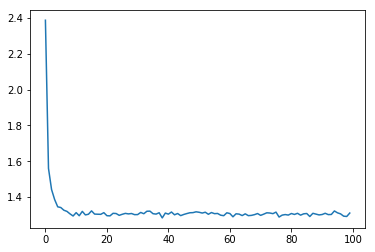

In [28]:
plt.plot(range(len(train_loss)),train_loss)